# Manual Approach

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm    

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer, KNNImputer

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, auc, roc_curve, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import classification_report

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

from sklearn.base import BaseEstimator, ClassifierMixin, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier

import joblib
import dill
import optuna

# Data Loading

In [3]:
x_train = pd.read_csv("X_Train_Data_Input.csv")
y_train = pd.read_csv("Y_Train_Data_Target.csv")
x_test = pd.read_csv("X_Test_Data_Input.csv")
y_test = pd.read_csv("Y_Test_Data_Target.csv")

# Data Analysing Step

In [4]:
x_train

ID  Column0  Column1  Column2   Column3  \
0       ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1       7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2       22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3       59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4       f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   
...                                  ...      ...      ...      ...       ...   
785128  01b7d7be203dbf2a3d75c9770d68dfb6      0.0      304   1126.0  0.678139   
785129  c7993f2c4c15f46f366f6daaa747197d      0.0     2495   2265.0  0.678139   
785130  a34b544f113a6d3b4eb353909a378afb      0.0     2495   3760.0  0.678139   
785131  fe5b1826c9e7c1864886b233402df330      0.0     2480   4493.0  0.001462   
785132  c3862b6625043b647d275e9825a7d6ea      0.0     2495   4202.0  0.678139   

         Column4   Column5   Column6   Column7   Column8  ...  Column12  \
0       0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0   
1       0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0   
2      -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1   
3            NaN       NaN -0.407939 -0.015607 -0.774979  ...         0   
4      -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0   
...          ...       ...       ...       ...       ...  ...       ...   
785128  0.701403 -0.007469 -0.407939 -0.015607 -0.774979  ...         0   
785129  0.701403 -0.007468 -0.407939 -0.015607  0.509591  ...         1   
785130  0.701403 -0.007469 -0.407939 -0.015607  0.218972  ...         1   
785131  0.062121 -0.007468 -0.407939 -0.015607  0.400071  ...         1   
785132  0.701403 -0.007467  3.440511 -0.015603  0.471097  ...         0   

        Column13  Column14  Column15  Column16  Column17  Column18  Column19  \
0              0  0.001351   0.00339       0.0         0       0.0         0   
1              0  0.001351   0.00339       0.0         0       0.0         0   
2              1  0.001351   0.00339       0.0         0       0.0         0   
3              0       NaN   0.00339       0.0         0       1.0         0   
4              0       NaN   0.00339       0.0         0       0.0         0   
...          ...       ...       ...       ...       ...       ...       ...   
785128         0       NaN   0.00339       0.0         0       1.0         0   
785129         1  0.001351   0.00339       0.0         0       0.0         0   
785130         1  0.001351   0.00339       0.0         0       0.0         0   
785131         1  0.001351   0.00339       0.0         0       0.0         0   
785132         0       NaN   0.00339       0.0         0       0.0         0   

        Column20  Column21  
0              0         0  
1              0         0  
2              0         0  
3              0         0  
4              0         0  
...          ...       ...  
785128         0         0  
785129         0         0  
785130         0         0  
785131         0         0  
785132         0         0  

[785133 rows x 23 columns]

In [5]:
y_train

ID  target
0       ad1a67e4cbddc767a3456b0d94299b9e       0
1       7246d2f76ac0c217ec25e72ea5f014cb       0
2       22ba388e7dd14c13342c49e75fc29dda       0
3       59f9b981472d97342587fb3e6392aeb1       1
4       f6317cf7ecf126859804eddff279aead       0
...                                  ...     ...
785128  01b7d7be203dbf2a3d75c9770d68dfb6       0
785129  c7993f2c4c15f46f366f6daaa747197d       0
785130  a34b544f113a6d3b4eb353909a378afb       0
785131  fe5b1826c9e7c1864886b233402df330       0
785132  c3862b6625043b647d275e9825a7d6ea       0

[785133 rows x 2 columns]

In [6]:
x_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785133 entries, 0 to 785132
Data columns (total 23 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        785133 non-null  object 
 1   Column0   785124 non-null  float64
 2   Column1   785133 non-null  int64  
 3   Column2   785133 non-null  float64
 4   Column3   658830 non-null  float64
 5   Column4   657423 non-null  float64
 6   Column5   617953 non-null  float64
 7   Column6   781283 non-null  float64
 8   Column7   785133 non-null  float64
 9   Column8   781283 non-null  float64
 10  Column9   52996 non-null   float64
 11  Column10  785133 non-null  int64  
 12  Column11  785133 non-null  int64  
 13  Column12  785133 non-null  int64  
 14  Column13  785133 non-null  int64  
 15  Column14  419430 non-null  float64
 16  Column15  768677 non-null  float64
 17  Column16  785133 non-null  float64
 18  Column17  785133 non-null  int64  
 19  Column18  785133 non-null  float64
 20  Colu

In [7]:
x_train.describe().T

count         mean          std          min          25%  \
Column0   785124.0     0.440757     1.163275     0.000000     0.000000   
Column1   785133.0  1321.788614   907.267965 -1080.000000   515.000000   
Column2   785133.0  2951.279411  2143.140140   -47.000000  1129.000000   
Column3   658830.0    -0.000210     0.999935    -2.028572    -0.675216   
Column4   657423.0    -0.000855     1.000350    -1.855728    -0.577162   
Column5   617953.0    -0.000367     1.015255    -0.007469    -0.007469   
Column6   781283.0    -0.000709     0.998984    -0.407939    -0.407939   
Column7   785133.0     0.000727     1.045883    -0.015607    -0.015607   
Column8   781283.0    -0.000158     1.056769    -0.774979    -0.774979   
Column9    52996.0     0.005245     1.111058    -0.088554    -0.086503   
Column10  785133.0     0.240575     0.427433     0.000000     0.000000   
Column11  785133.0     0.310443     0.462675     0.000000     0.000000   
Column12  785133.0     0.363122     0.480900     0.000000     0.000000   
Column13  785133.0     0.328285     0.469589     0.000000     0.000000   
Column14  419430.0    -0.000863     1.291202  -832.749615     0.001351   
Column15  768677.0    -0.000837     1.283393 -1091.545904     0.003390   
Column16  785133.0     0.001206     0.034855     0.000000     0.000000   
Column17  785133.0     0.270092     3.128214     0.000000     0.000000   
Column18  785133.0     0.147856     0.430530     0.000000     0.000000   
Column19  785133.0     0.018759     0.135671     0.000000     0.000000   
Column20  785133.0     0.009351     0.096249     0.000000     0.000000   
Column21  785133.0     0.002757     0.052439     0.000000     0.000000   

                  50%          75%           max  
Column0      0.000000     0.000000     18.000000  
Column1   1173.000000  2435.000000   2499.000000  
Column2   2709.000000  4472.000000  10290.000000  
Column3      0.678139     0.678139      0.678139  
Column4      0.701403     0.701403      0.701403  
Column5     -0.007469    -0.007468    551.421127  
Column6     -0.407939    -0.367723     14.985817  
Column7     -0.015607    -0.015607    201.687947  
Column8      0.122085     0.625528    323.992484  
Column9     -0.081820    -0.063140    133.911803  
Column10     0.000000     0.000000      1.000000  
Column11     0.000000     1.000000      1.000000  
Column12     0.000000     1.000000      1.000000  
Column13     0.000000     1.000000      1.000000  
Column14     0.001351     0.001351      8.514416  
Column15     0.003390     0.003390      0.012736  
Column16     0.000000     0.000000      2.000000  
Column17     0.000000     0.000000    728.000000  
Column18     0.000000     0.000000     12.000000  
Column19     0.000000     0.000000      1.000000  
Column20     0.000000     0.000000      1.000000  
Column21     0.000000     0.000000      1.000000

In [8]:
x_train.describe(exclude="number").T

count  unique                               top freq
ID  785133  785133  ad1a67e4cbddc767a3456b0d94299b9e    1

In [9]:
x_train.isna().sum()

ID               0
Column0          9
Column1          0
Column2          0
Column3     126303
Column4     127710
Column5     167180
Column6       3850
Column7          0
Column8       3850
Column9     732137
Column10         0
Column11         0
Column12         0
Column13         0
Column14    365703
Column15     16456
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

<Axes: >

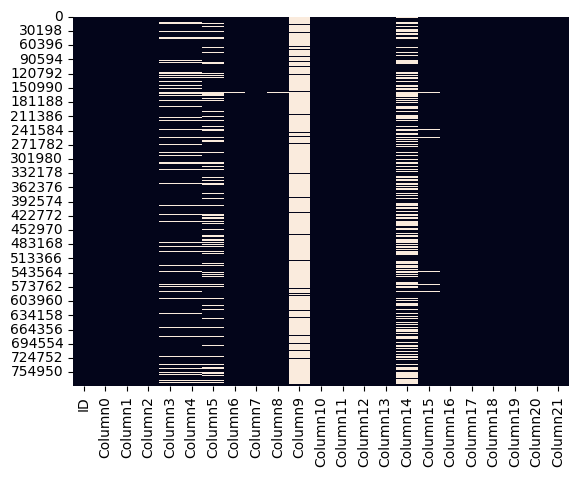

In [10]:
sns.heatmap(x_train.isna(), cbar=False)

In [11]:
data_corr = pd.concat([x_train, y_train], axis= 1)
data_corr

ID  Column0  Column1  Column2   Column3  \
0       ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1       7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2       22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3       59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4       f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   
...                                  ...      ...      ...      ...       ...   
785128  01b7d7be203dbf2a3d75c9770d68dfb6      0.0      304   1126.0  0.678139   
785129  c7993f2c4c15f46f366f6daaa747197d      0.0     2495   2265.0  0.678139   
785130  a34b544f113a6d3b4eb353909a378afb      0.0     2495   3760.0  0.678139   
785131  fe5b1826c9e7c1864886b233402df330      0.0     2480   4493.0  0.001462   
785132  c3862b6625043b647d275e9825a7d6ea      0.0     2495   4202.0  0.678139   

         Column4   Column5   Column6   Column7   Column8  ...  Column14  \
0       0.701403 -0.007468  0.434190 -0.015603  0.606265  ...  0.001351   
1       0.701403 -0.007468  1.554998 -0.015574  0.329946  ...  0.001351   
2      -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...  0.001351   
3            NaN       NaN -0.407939 -0.015607 -0.774979  ...       NaN   
4      -1.855728       NaN -0.407939 -0.015607 -0.774979  ...       NaN   
...          ...       ...       ...       ...       ...  ...       ...   
785128  0.701403 -0.007469 -0.407939 -0.015607 -0.774979  ...       NaN   
785129  0.701403 -0.007468 -0.407939 -0.015607  0.509591  ...  0.001351   
785130  0.701403 -0.007469 -0.407939 -0.015607  0.218972  ...  0.001351   
785131  0.062121 -0.007468 -0.407939 -0.015607  0.400071  ...  0.001351   
785132  0.701403 -0.007467  3.440511 -0.015603  0.471097  ...       NaN   

        Column15  Column16  Column17  Column18  Column19  Column20  Column21  \
0        0.00339       0.0         0       0.0         0         0         0   
1        0.00339       0.0         0       0.0         0         0         0   
2        0.00339       0.0         0       0.0         0         0         0   
3        0.00339       0.0         0       1.0         0         0         0   
4        0.00339       0.0         0       0.0         0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
785128   0.00339       0.0         0       1.0         0         0         0   
785129   0.00339       0.0         0       0.0         0         0         0   
785130   0.00339       0.0         0       0.0         0         0         0   
785131   0.00339       0.0         0       0.0         0         0         0   
785132   0.00339       0.0         0       0.0         0         0         0   

                                      ID  target  
0       ad1a67e4cbddc767a3456b0d94299b9e       0  
1       7246d2f76ac0c217ec25e72ea5f014cb       0  
2       22ba388e7dd14c13342c49e75fc29dda       0  
3       59f9b981472d97342587fb3e6392aeb1       1  
4       f6317cf7ecf126859804eddff279aead       0  
...                                  ...     ...  
785128  01b7d7be203dbf2a3d75c9770d68dfb6       0  
785129  c7993f2c4c15f46f366f6daaa747197d       0  
785130  a34b544f113a6d3b4eb353909a378afb       0  
785131  fe5b1826c9e7c1864886b233402df330       0  
785132  c3862b6625043b647d275e9825a7d6ea       0  

[785133 rows x 25 columns]

<Axes: >

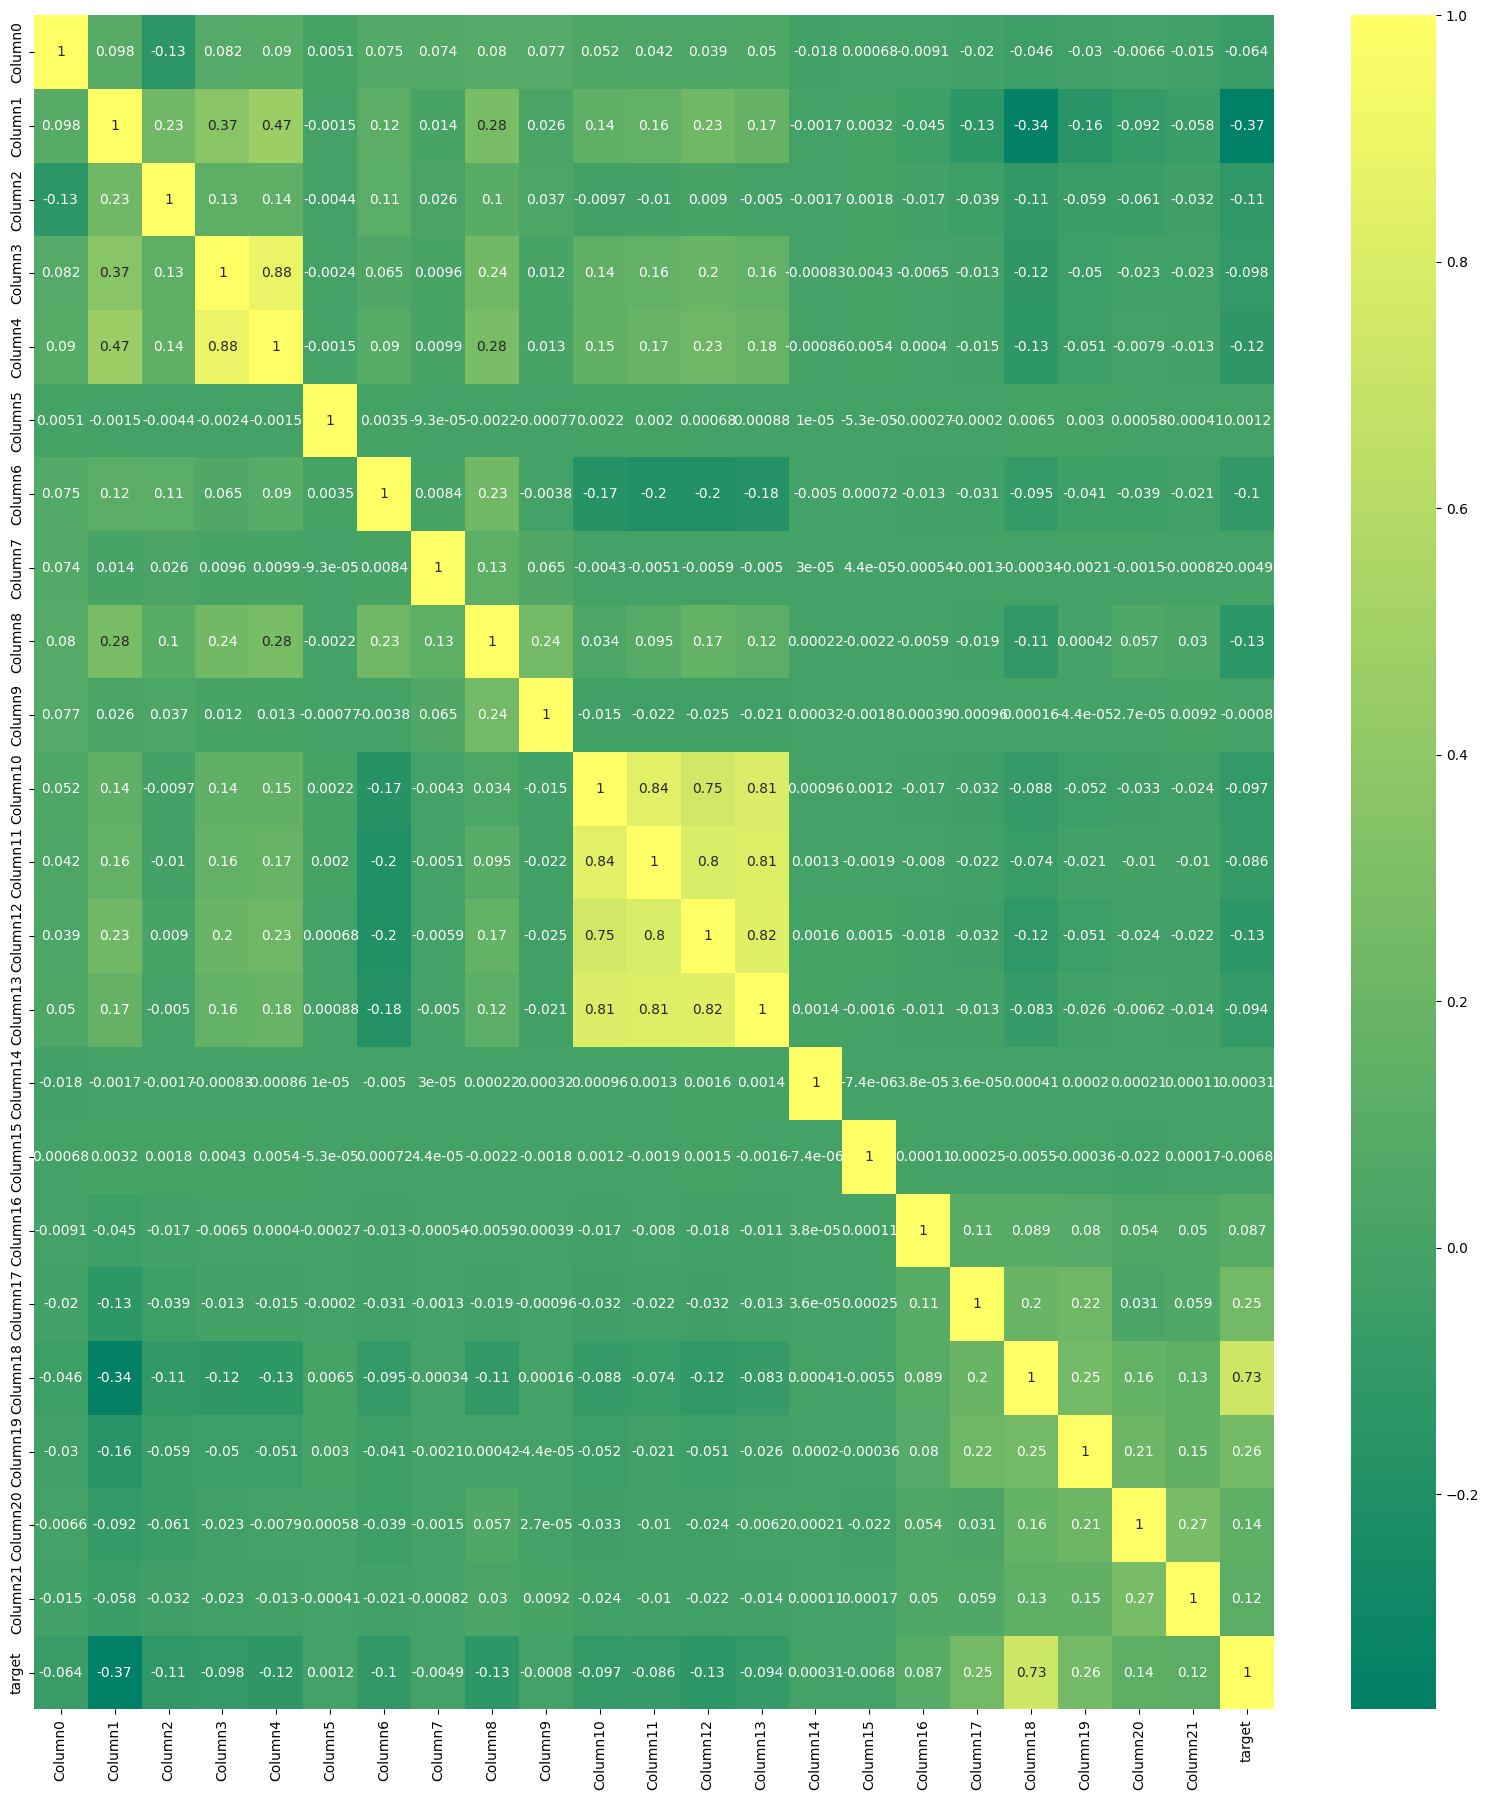

In [12]:
fig = plt.figure(figsize=(20, 22))
sns.heatmap(data_corr.select_dtypes(include='number').corr(), cbar=True, annot=True, cmap='summer')

In [13]:
print('No. Of Duplicate Values in x_train :',x_train.duplicated().sum())

No. Of Duplicate Values in x_train : 0


In [14]:
y_train['target'].value_counts()

target
0    711100
1     74033
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

In [15]:
def draw_scatterplot(dataset, variables, nrows, ncols, title_of_dataset, color):
    fig = plt.figure(figsize = (26, 20), dpi = 200)
    title = 'Distribution Of '+ title_of_dataset + ' Dataset'
    plt.suptitle(title, fontsize = 24)
    
    colors = sns.color_palette(color, n_colors = 27)
    
    for i, var in enumerate(variables):
        ax = fig.add_subplot(nrows, ncols, i + 1)
        sns.scatterplot(x = dataset.index, y = dataset[var], color = colors[i], ax = ax)
        ax.set_title(var + " Distribution")
        
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

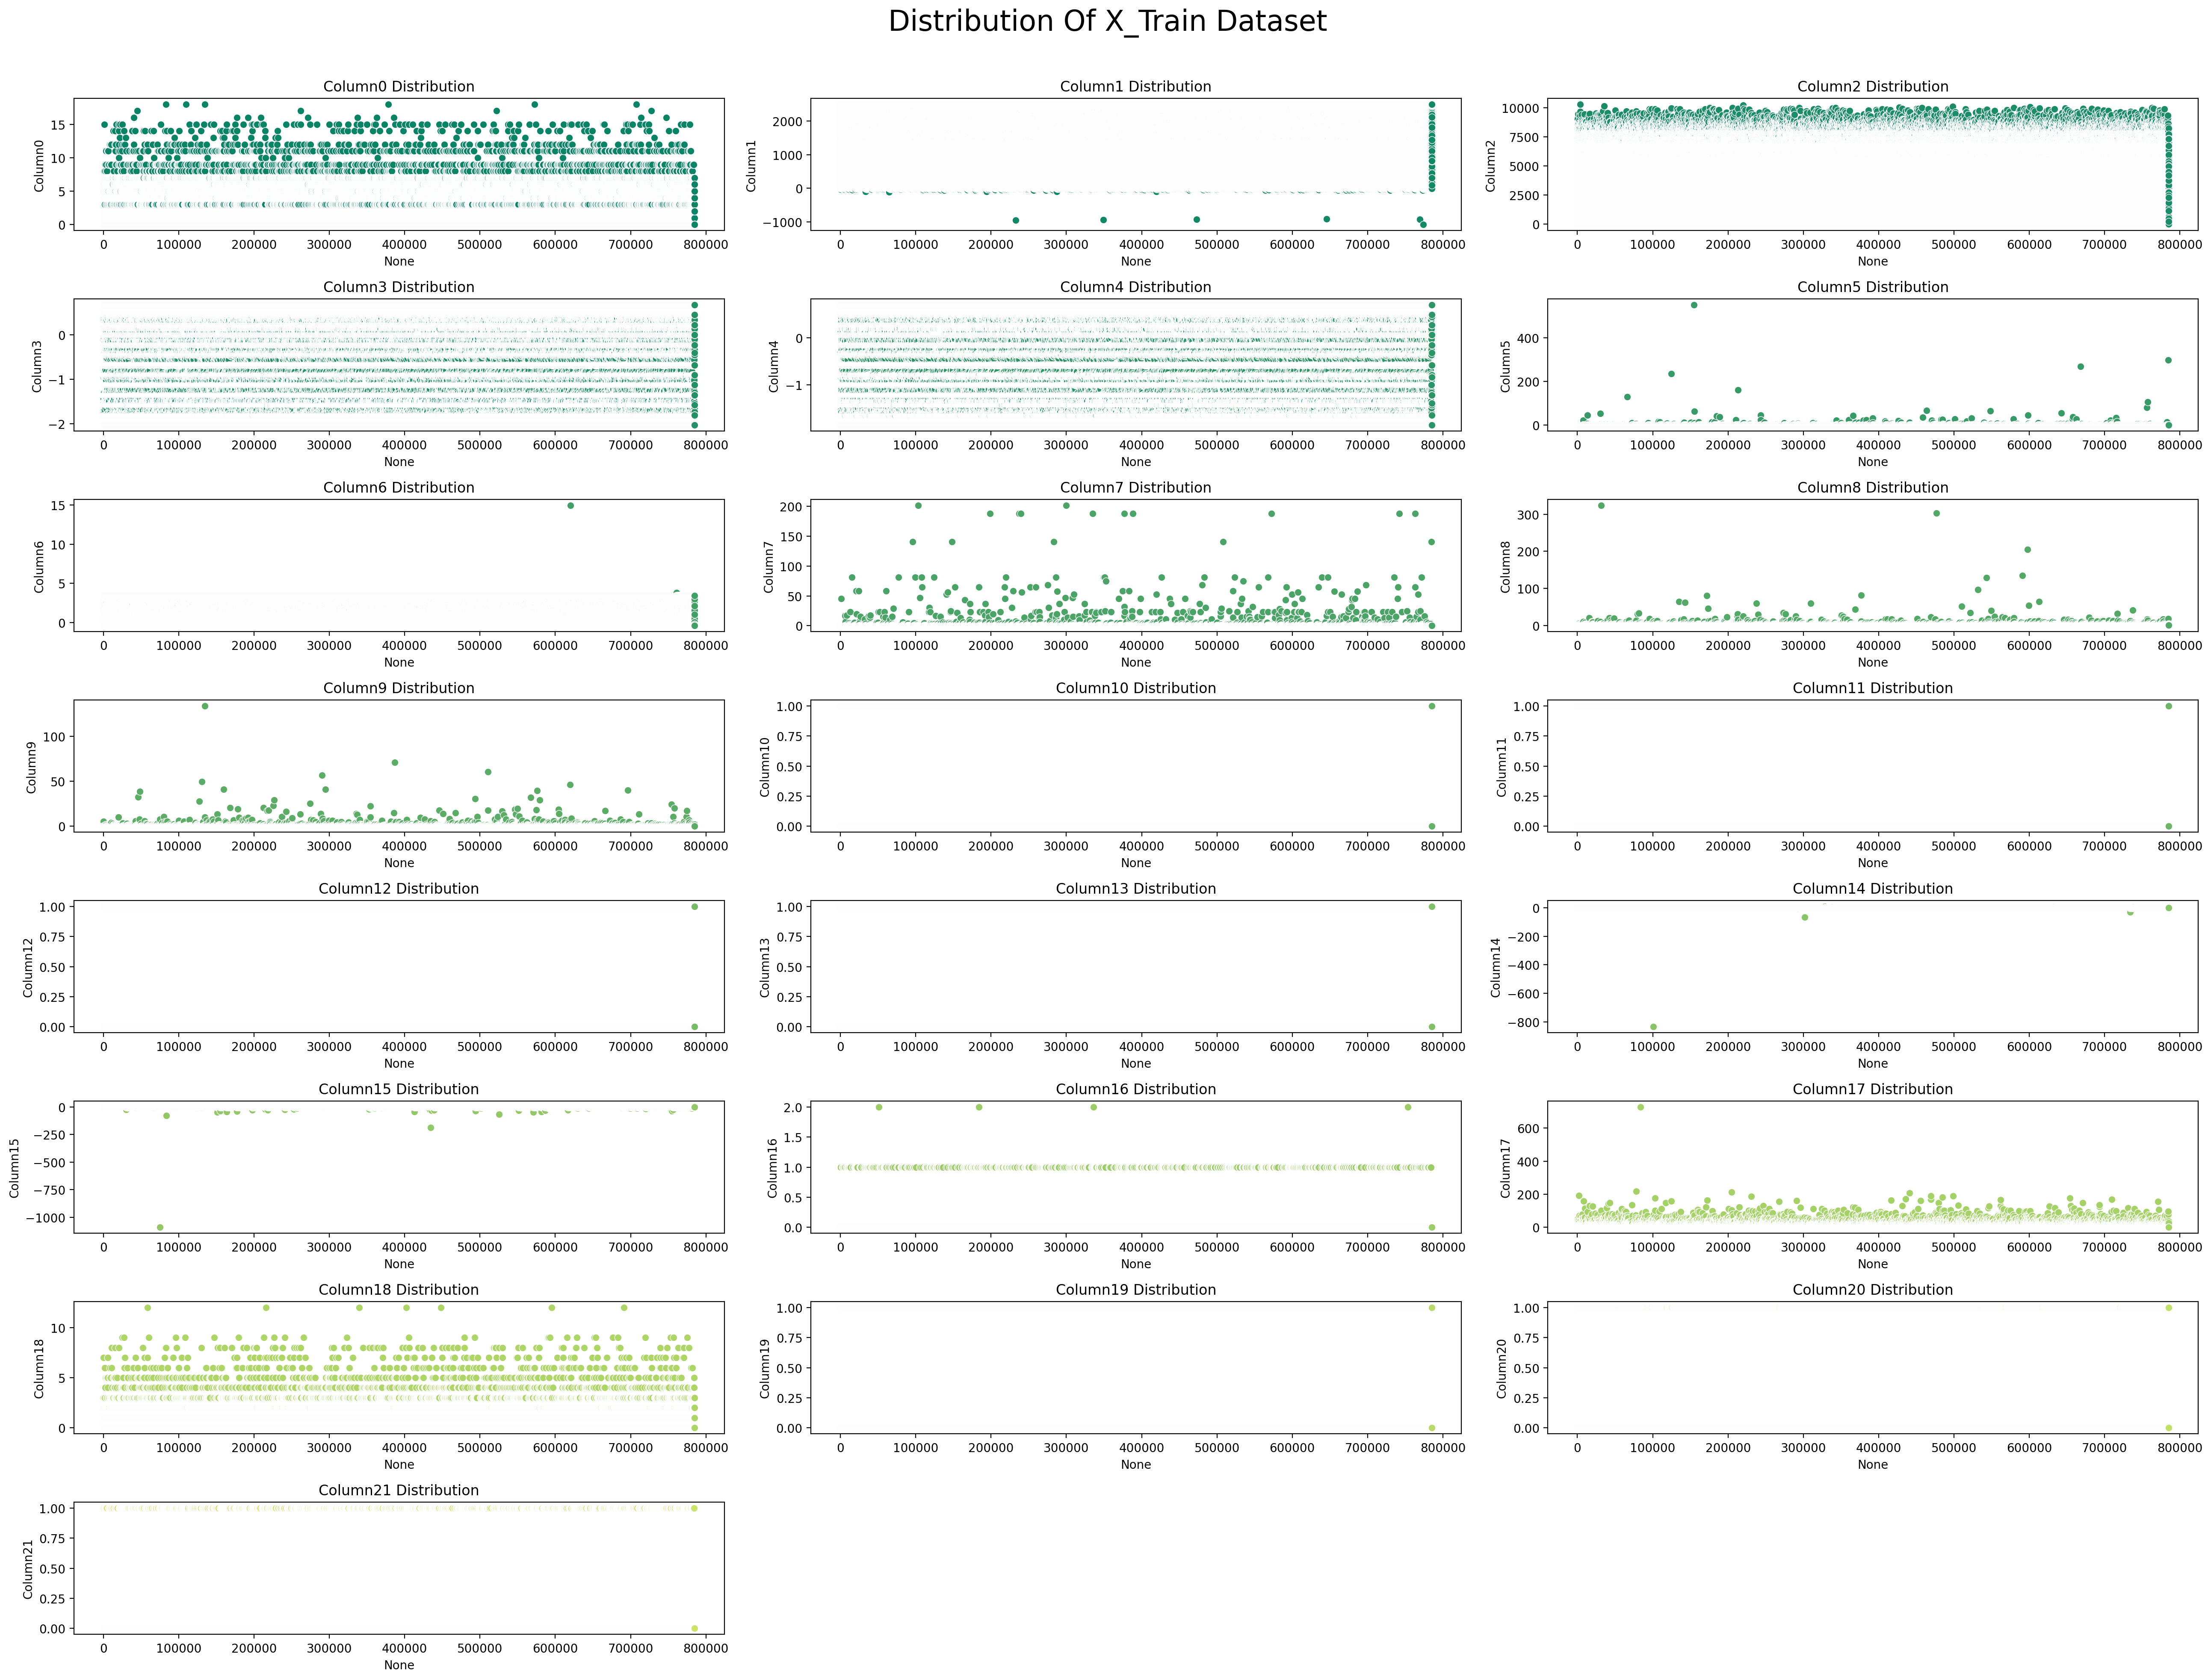

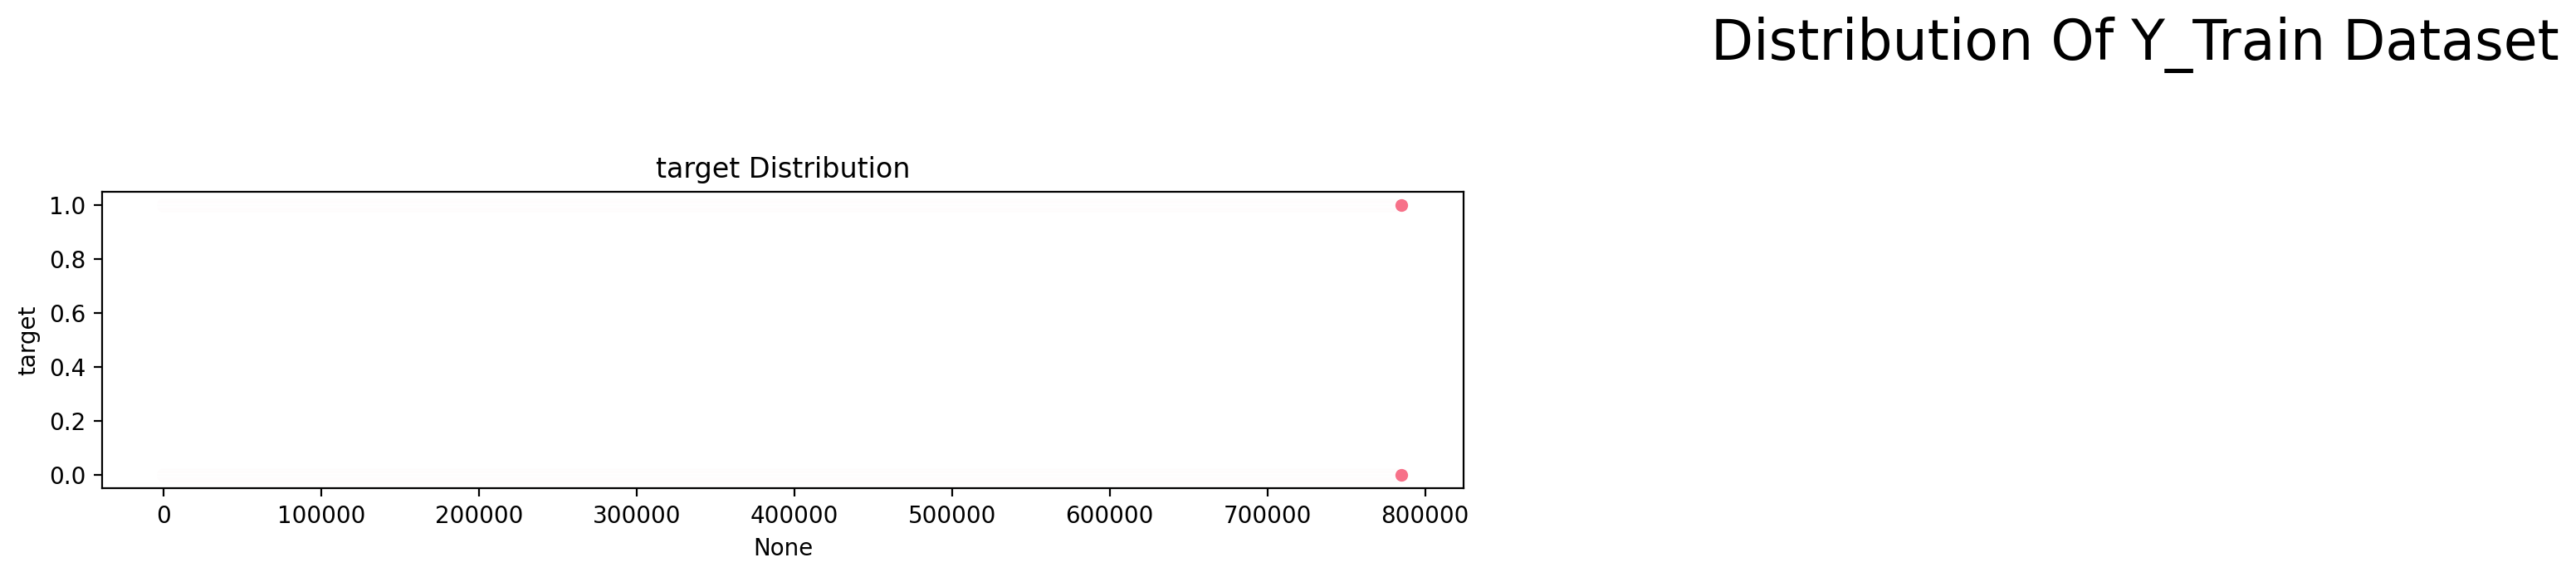

In [16]:
datasets = [x_train, y_train]
dataset_title = ['X_Train', 'Y_Train']

colors = ['summer', 'husl']

for i, data in enumerate(datasets):
    draw_scatterplot(data.select_dtypes('number'), data.select_dtypes('number').columns, 8, 3, dataset_title[i], colors[i])

In [17]:
def draw_distplot(dataset, variables, nrows, ncols, title_of_dataset, color):
    fig = plt.figure(figsize = (26, 20), dpi = 200)
    title = 'Distribution Of '+ title_of_dataset + ' Dataset'
    plt.suptitle(title, fontsize = 24)
    
    colors = sns.color_palette(color, n_colors = 27)
    
    for i, var in enumerate(variables):
        ax = fig.add_subplot(nrows, ncols, i + 1)
        sns.distplot(x = dataset[var], color = colors[i], ax = ax)
        ax.set_title(var + " Distribution")
        
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

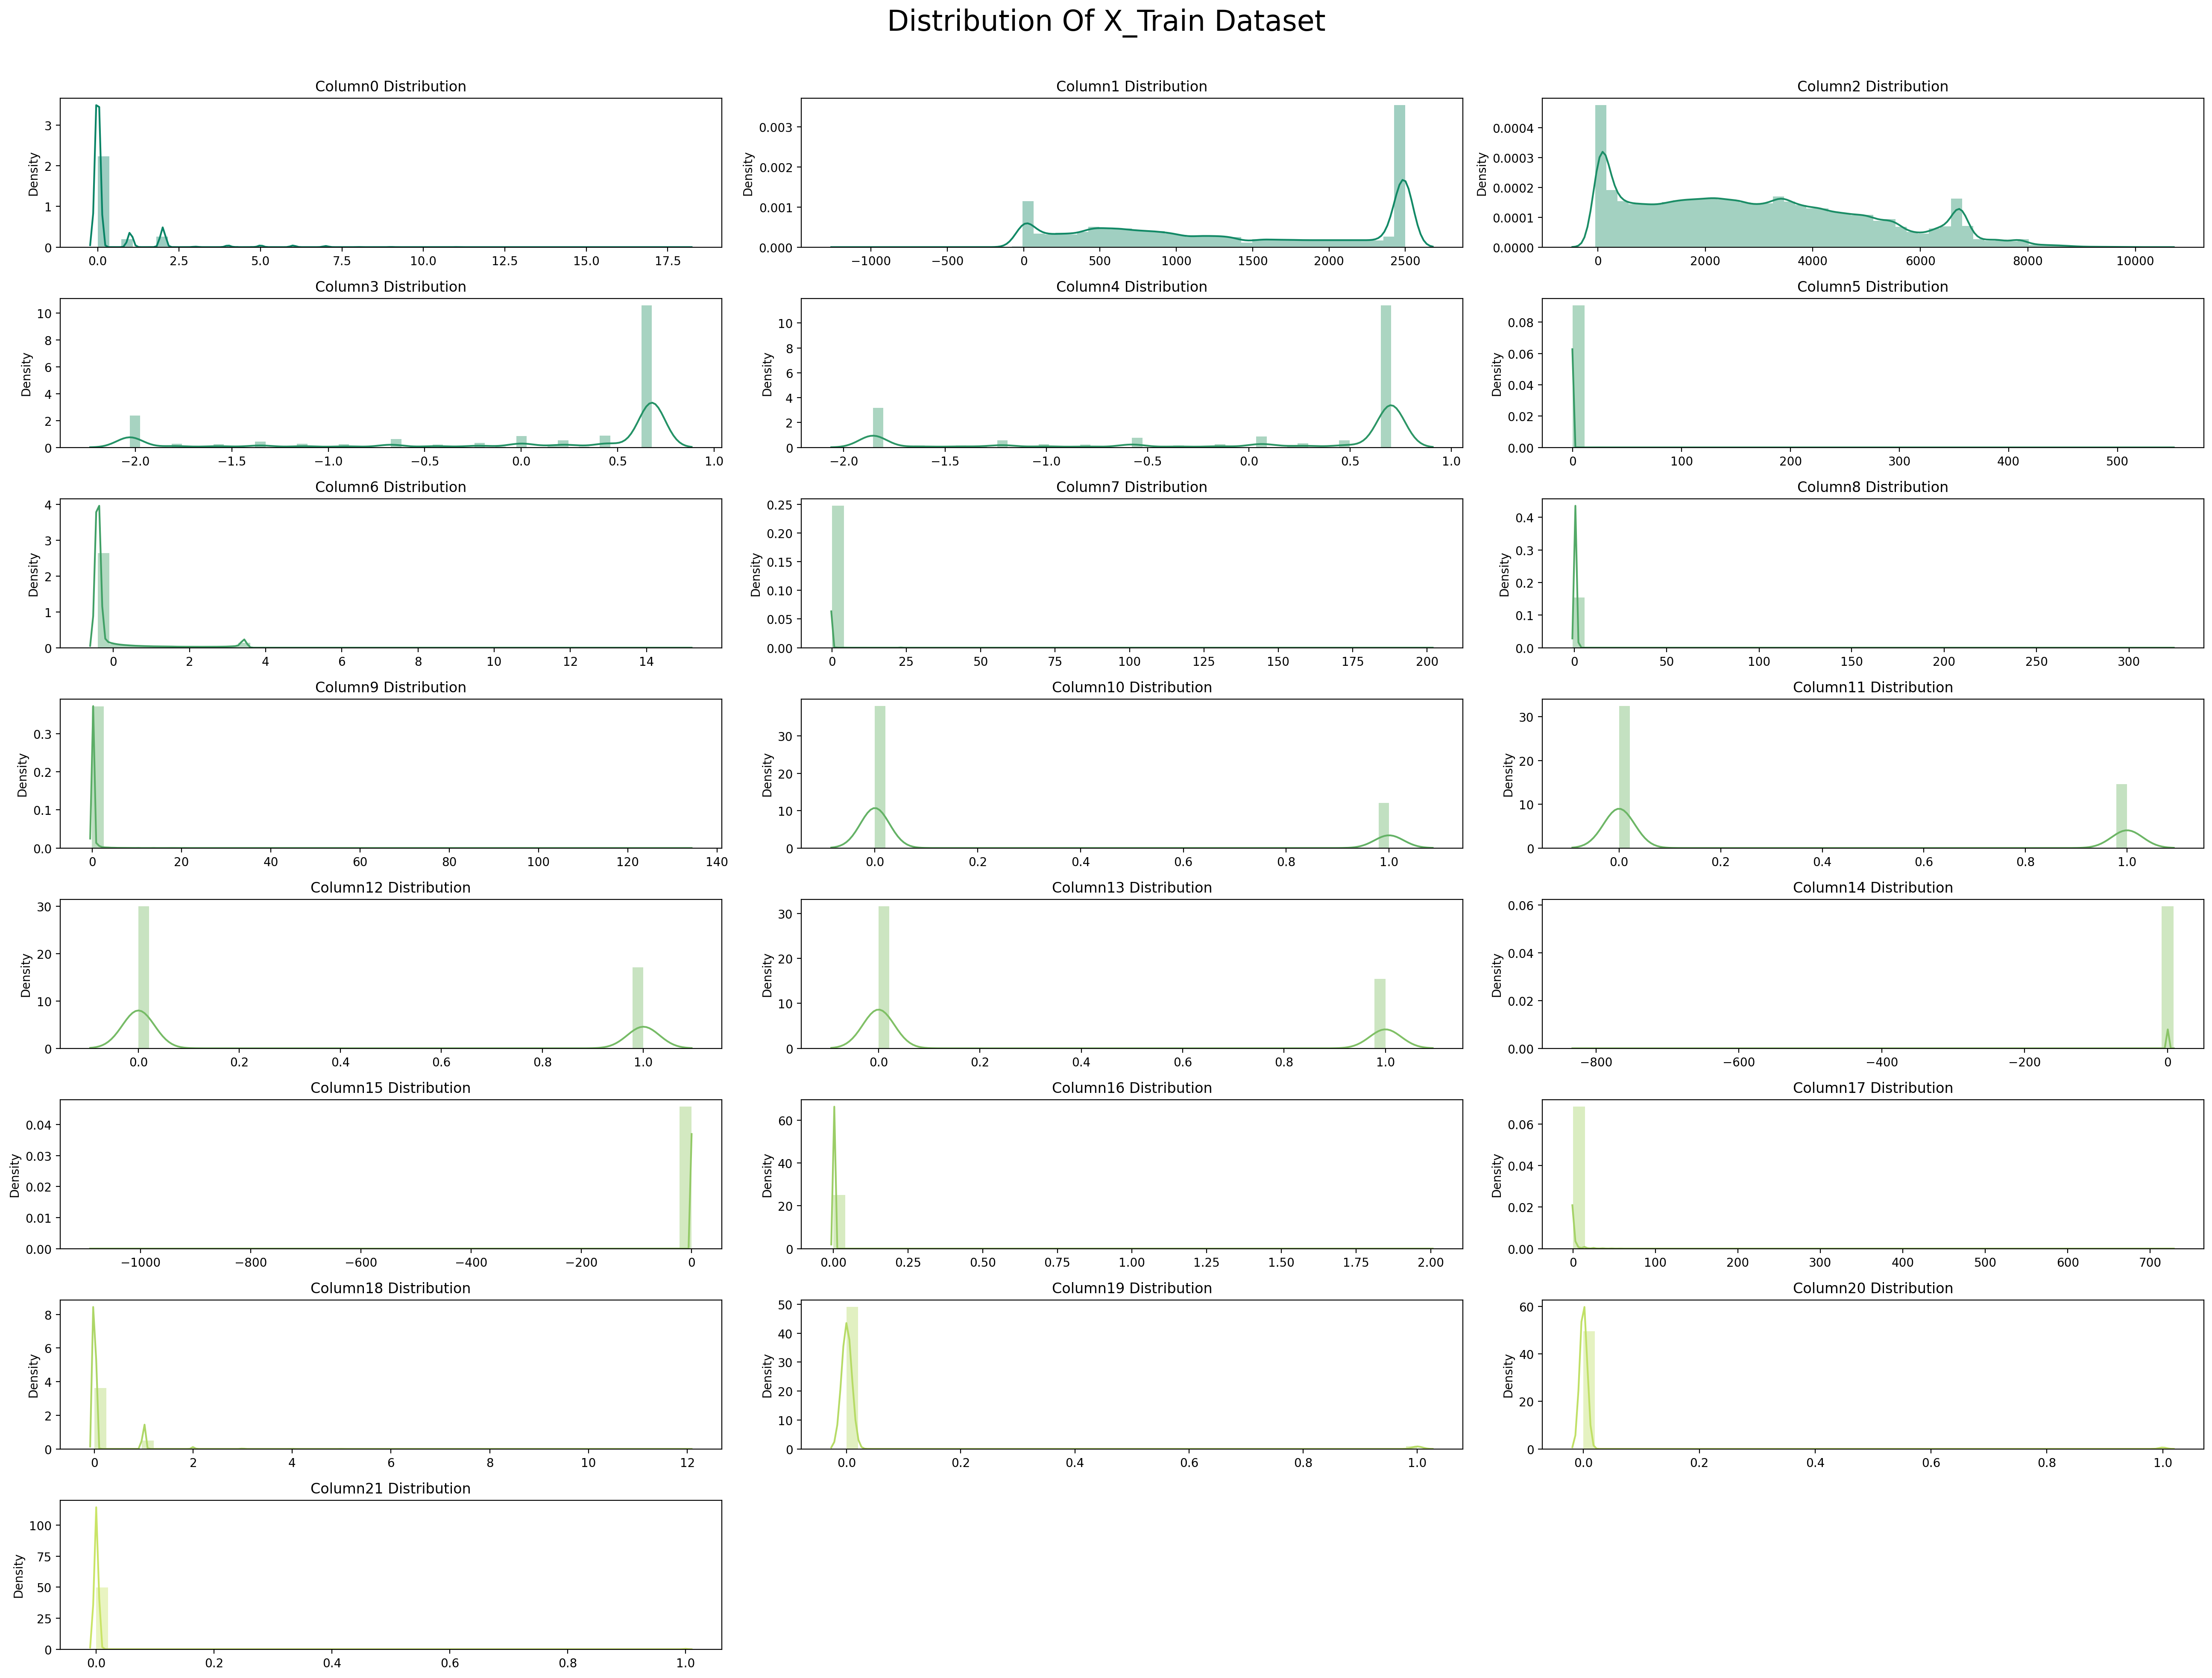

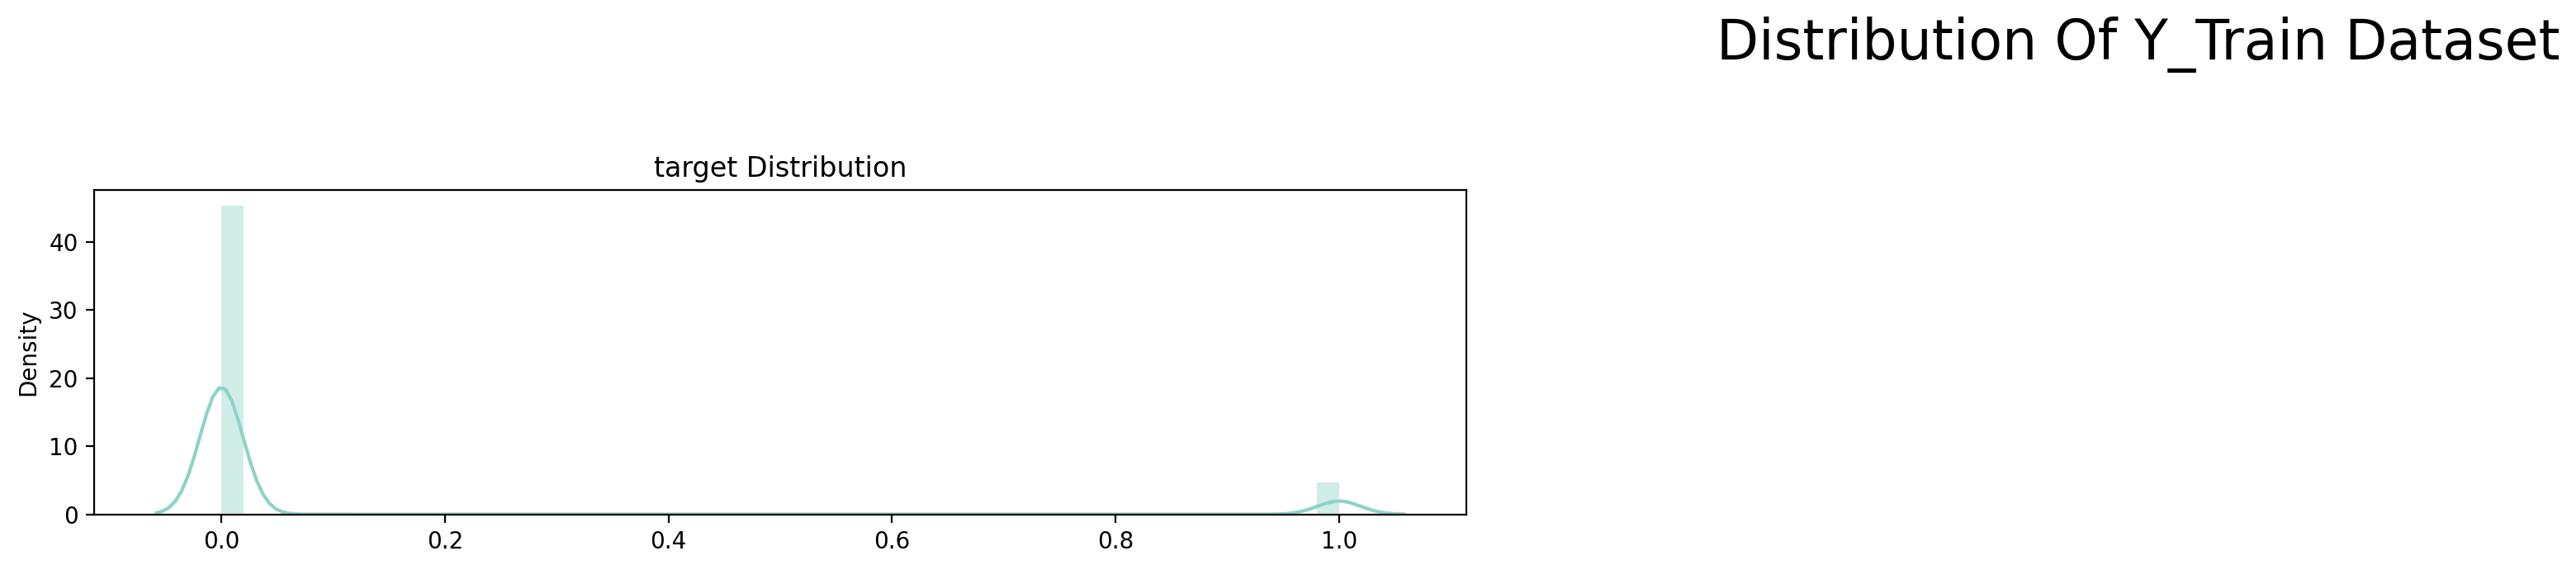

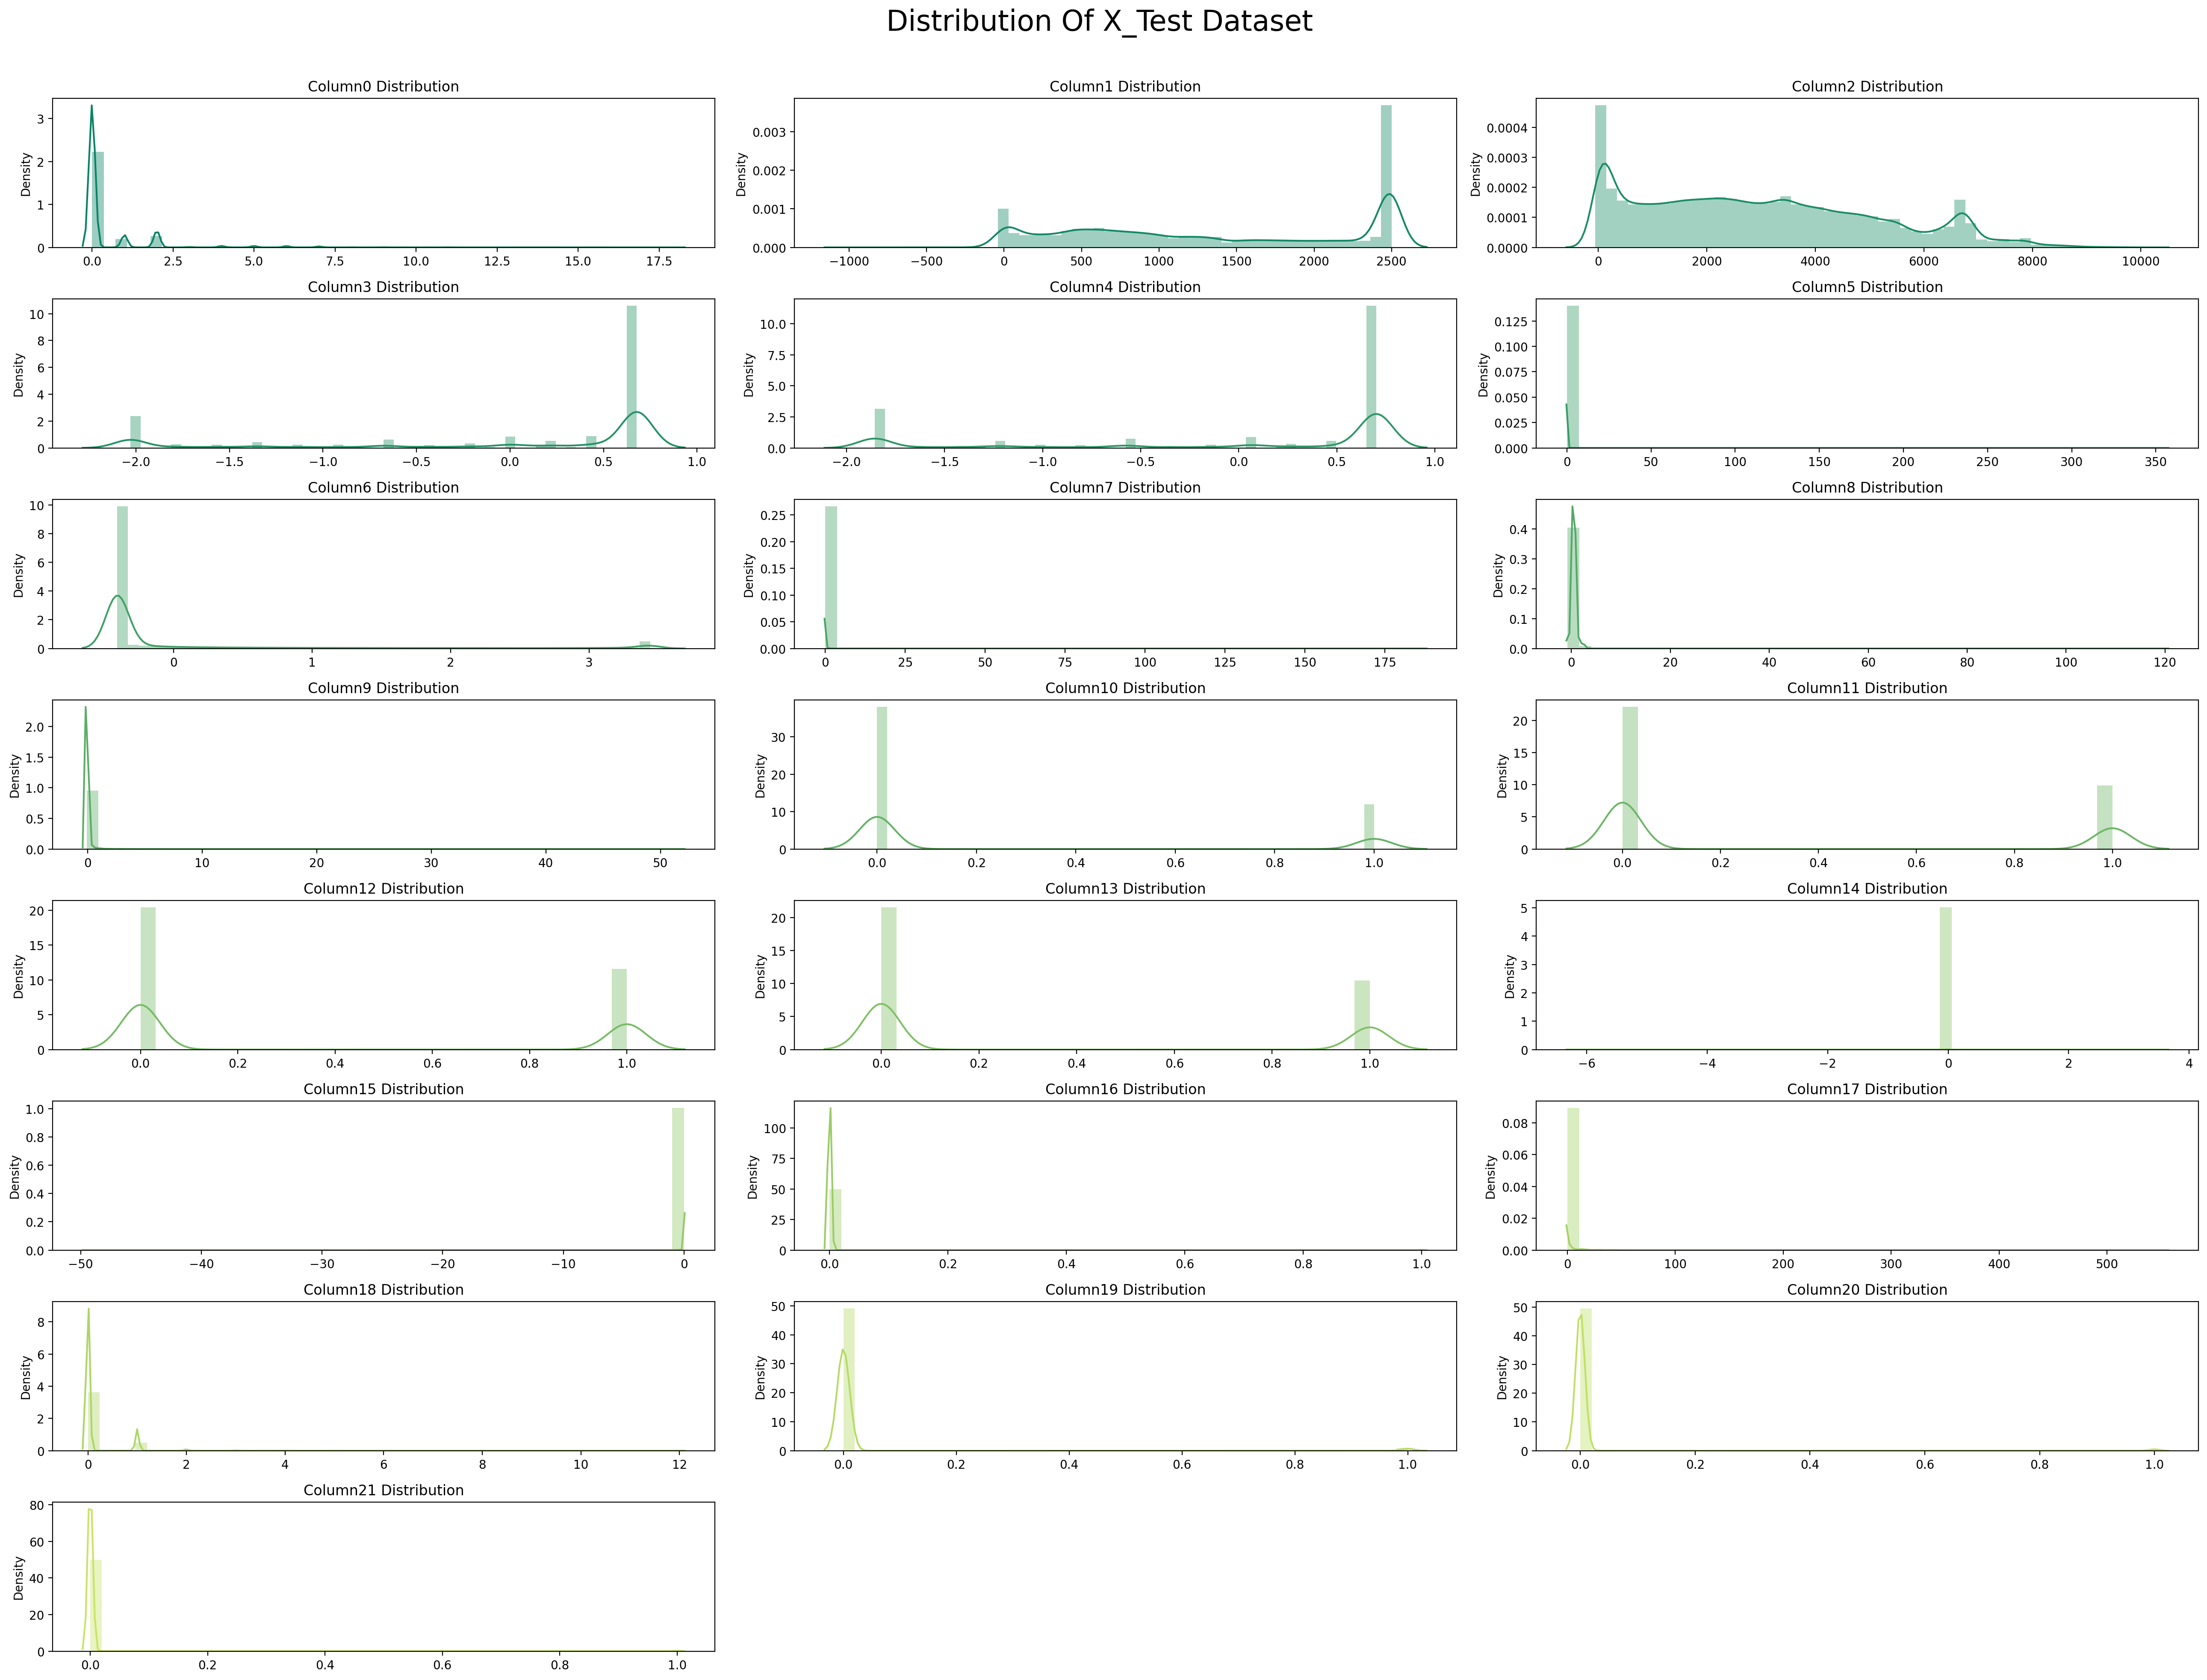

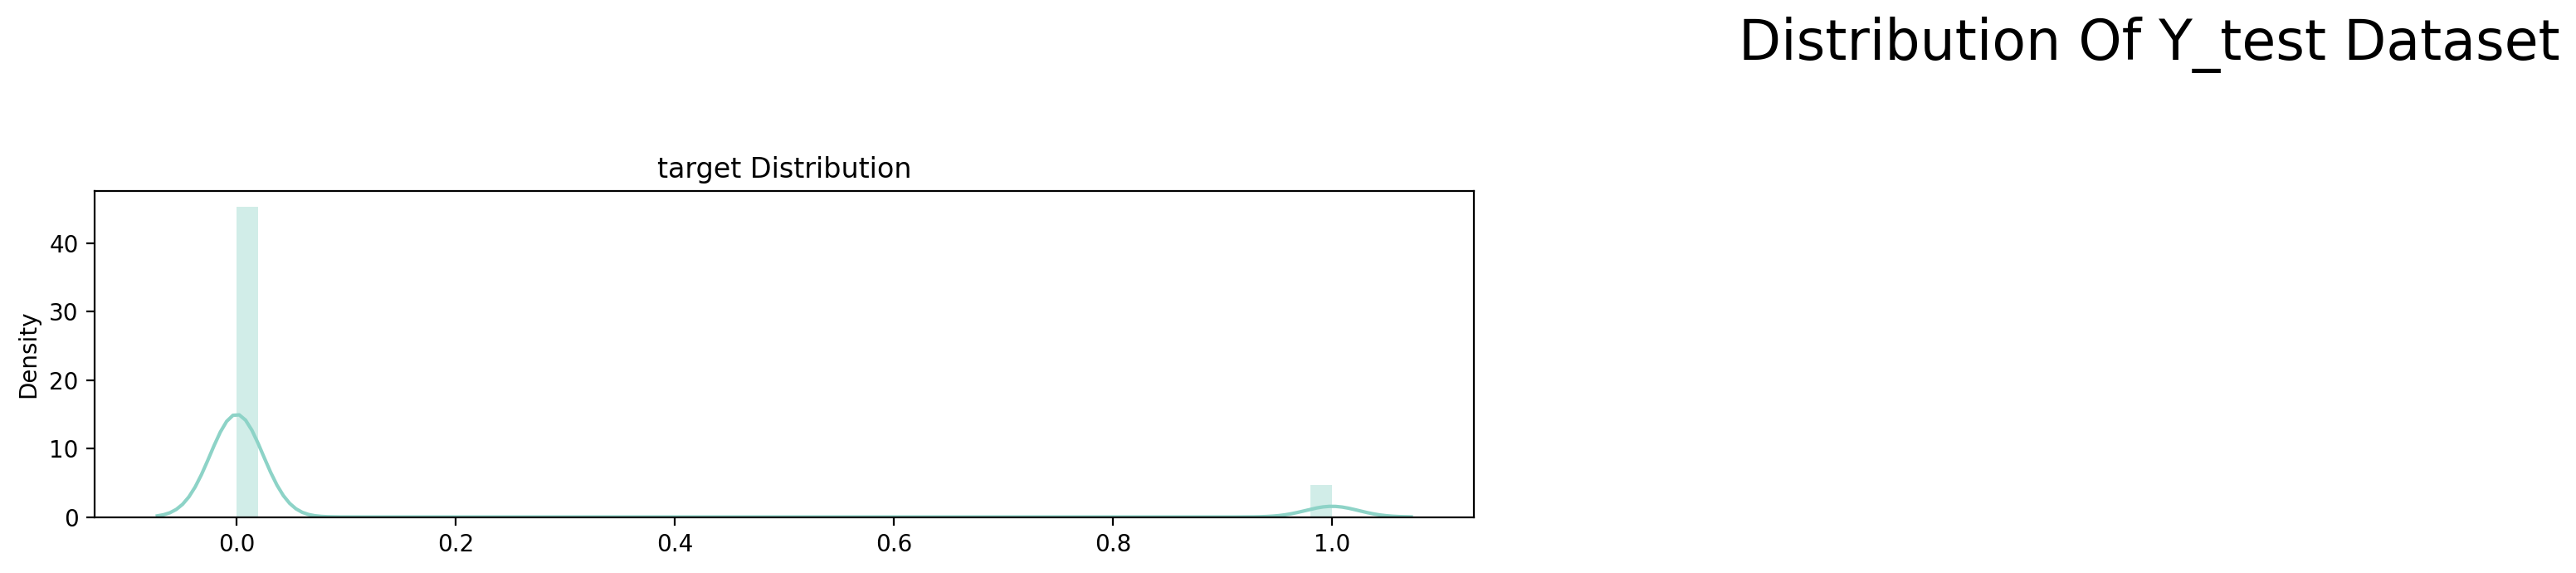

In [18]:
datasets = [x_train, y_train, x_test, y_test]
dataset_title = ['X_Train', 'Y_Train', 'X_Test', 'Y_test']

colors = ['summer', 'Set3', 'summer', 'Set3']

for i, data in enumerate(datasets):
    draw_distplot(data.select_dtypes('number'), data.select_dtypes('number').columns, 8, 3, dataset_title[i], colors[i])

In [19]:
def draw_boxplot(dataset, variables, nrows, ncols, title_of_dataset, color):
    fig = plt.figure(figsize = (26, 20), dpi = 200)
    title = 'Box Plot Of '+ title_of_dataset + ' Dataset'
    plt.suptitle(title, fontsize = 24)
    
    colors = sns.color_palette(color, n_colors = 27)
    
    for i, var in enumerate(variables):
        ax = fig.add_subplot(nrows, ncols, i + 1)
        sns.boxplot(x = dataset[var], notch=True, showcaps=True, color = colors[i], ax = ax)
        ax.set_title(var + " Distribution")
        
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

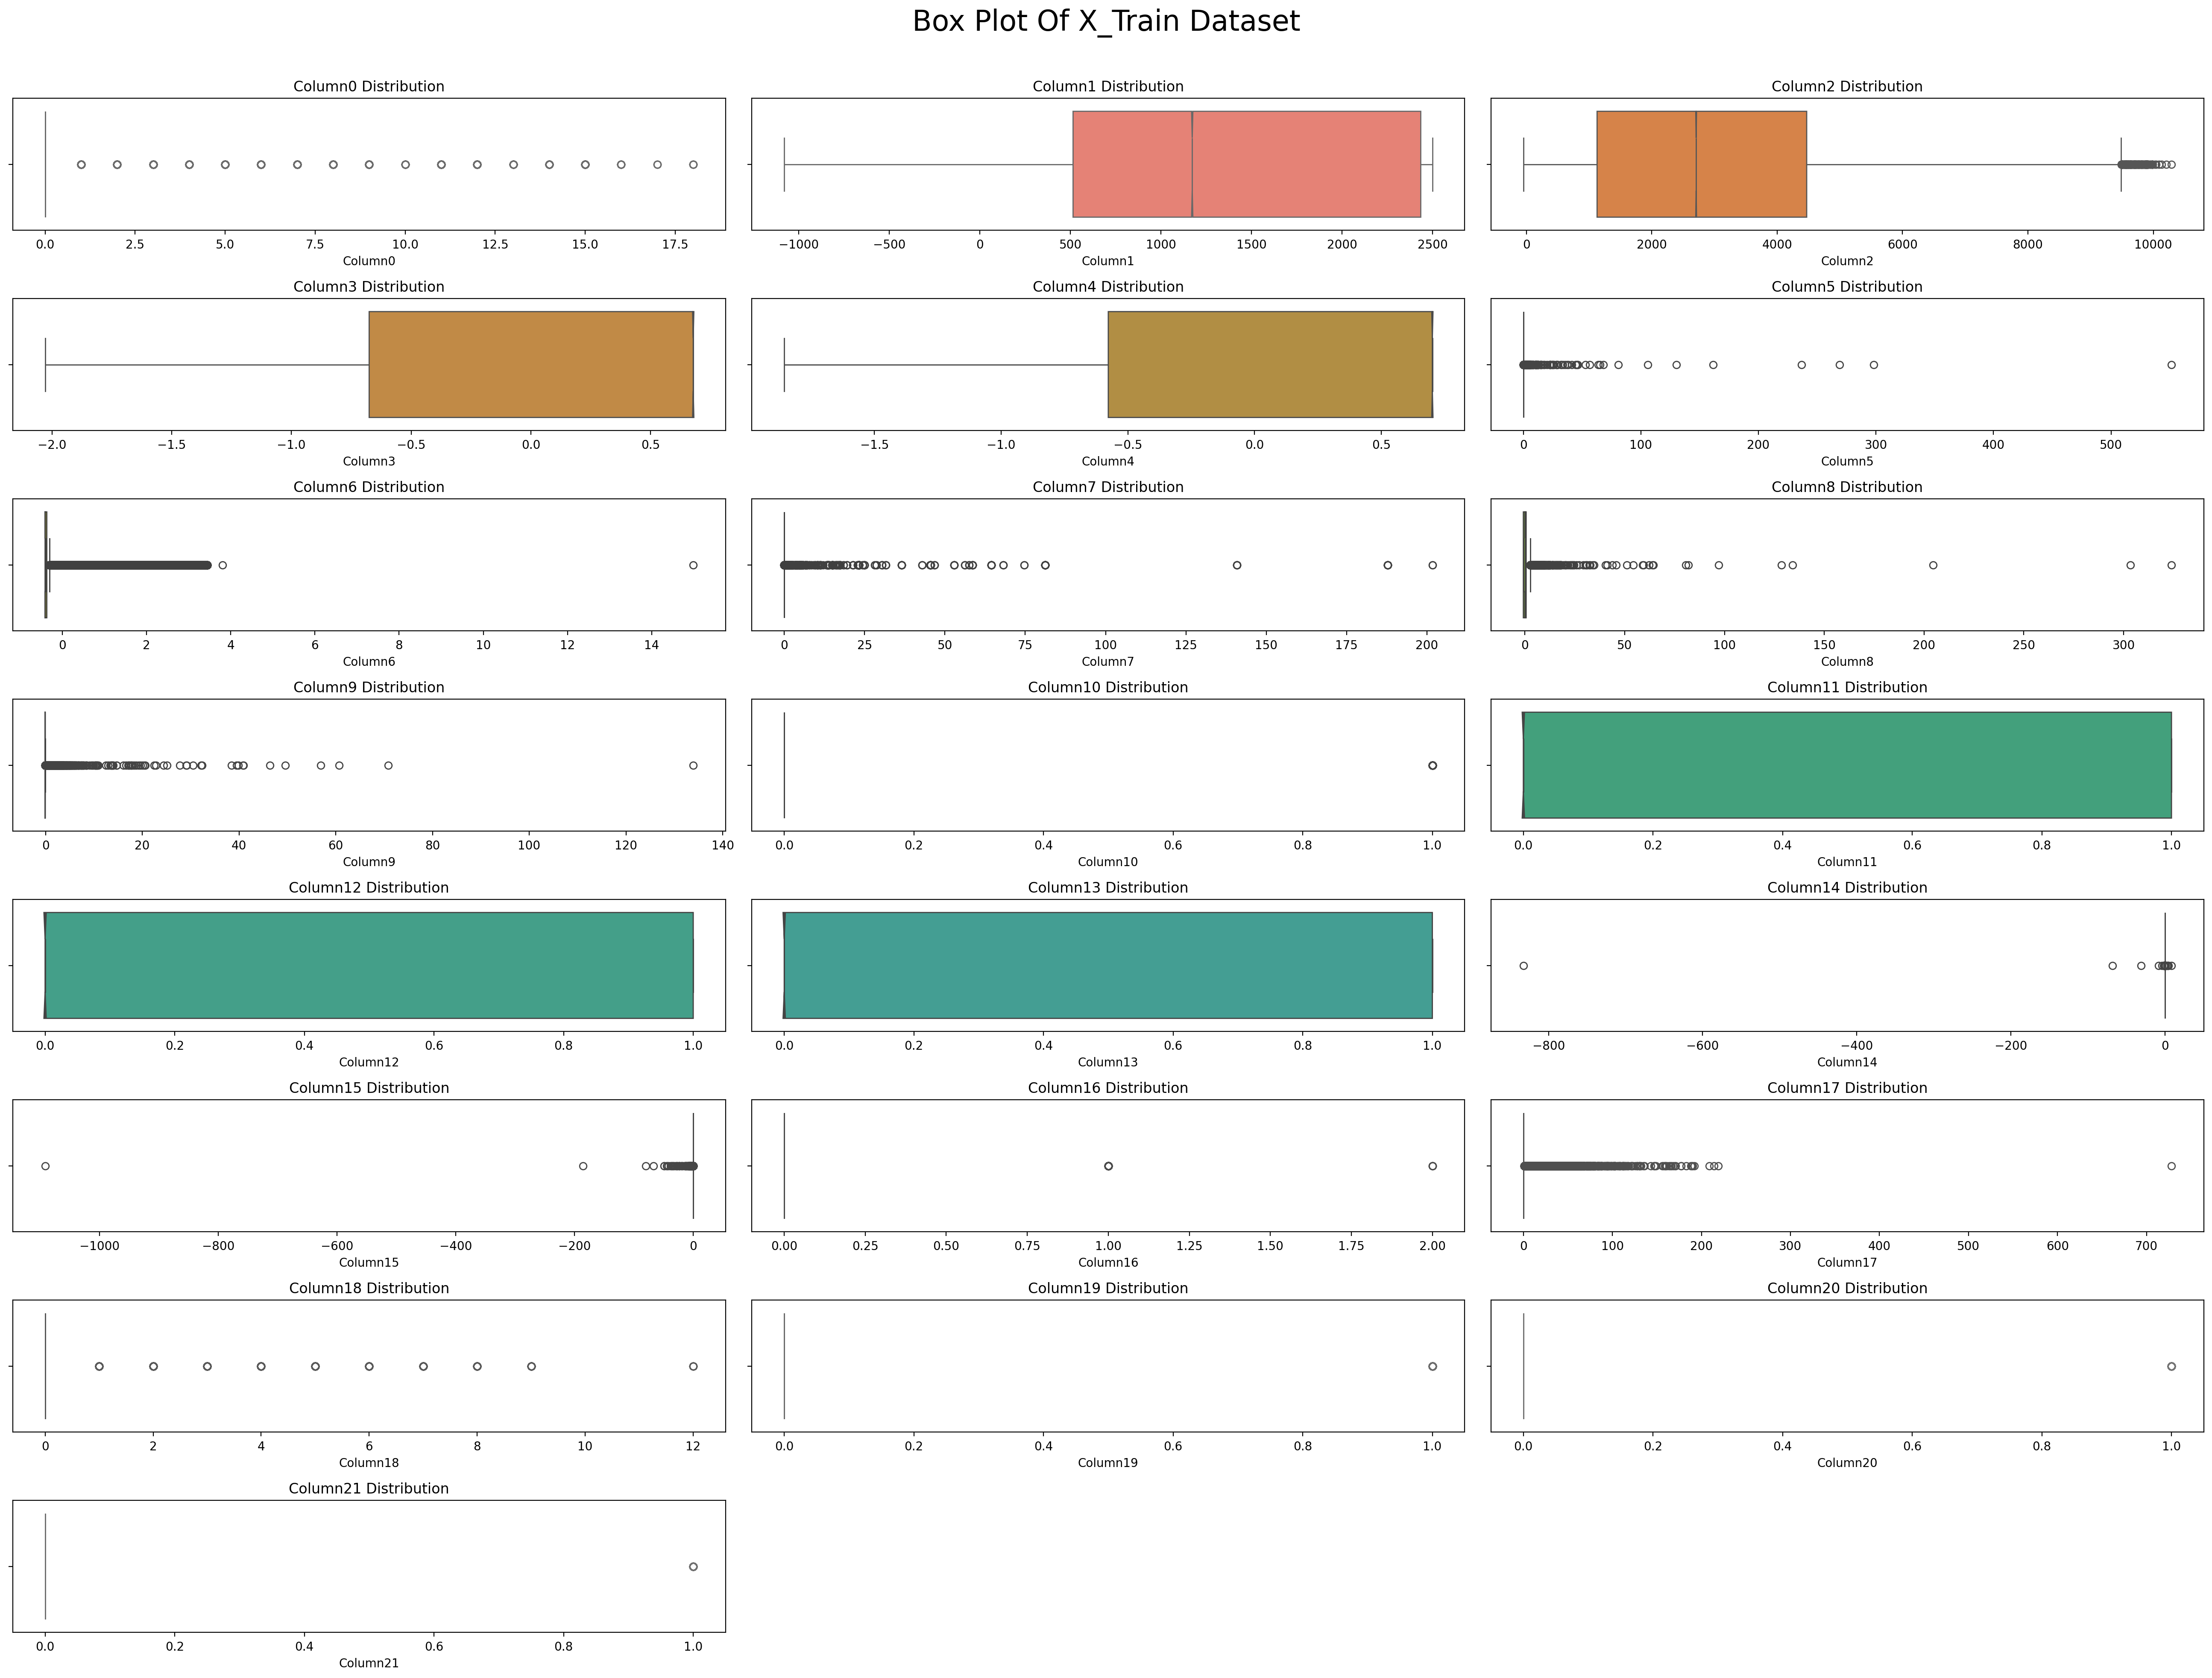

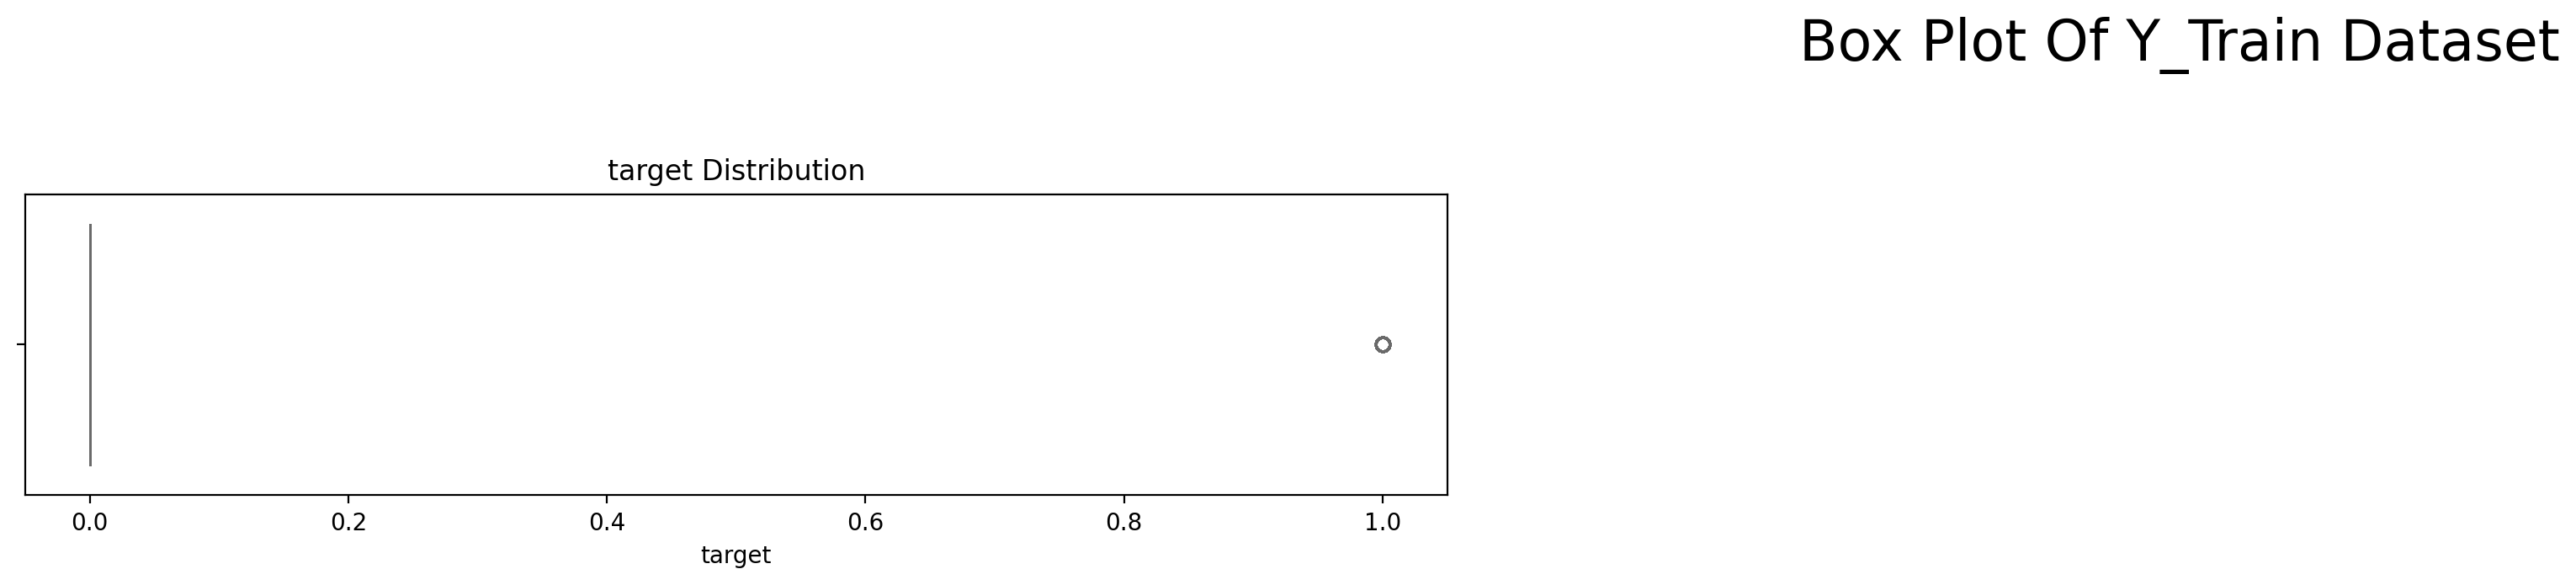

In [20]:
datasets = [x_train, y_train]
dataset_title = ['X_Train', 'Y_Train']

colors = ['husl', 'Set3']

for i, data in enumerate(datasets):
    draw_boxplot(data.select_dtypes('number'), data.select_dtypes('number').columns, 8, 3, dataset_title[i], colors[i])

In [21]:
def draw_qqplot(dataset, variables, nrows, ncols, title_of_dataset, color):
    fig = plt.figure(figsize = (26, 20), dpi = 200)
    title = 'Distribution Of '+ title_of_dataset + ' Dataset'
    plt.suptitle(title, fontsize = 24)
    
    colors = sns.color_palette(color, n_colors = 27)
    
    for i, var in enumerate(variables):
        ax = fig.add_subplot(nrows, ncols, i + 1)
        sm.qqplot(dataset[var], line ='45',  color = colors[i], ax = ax) 
        ax.set_title(var + " Distribution")
        
    fig.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

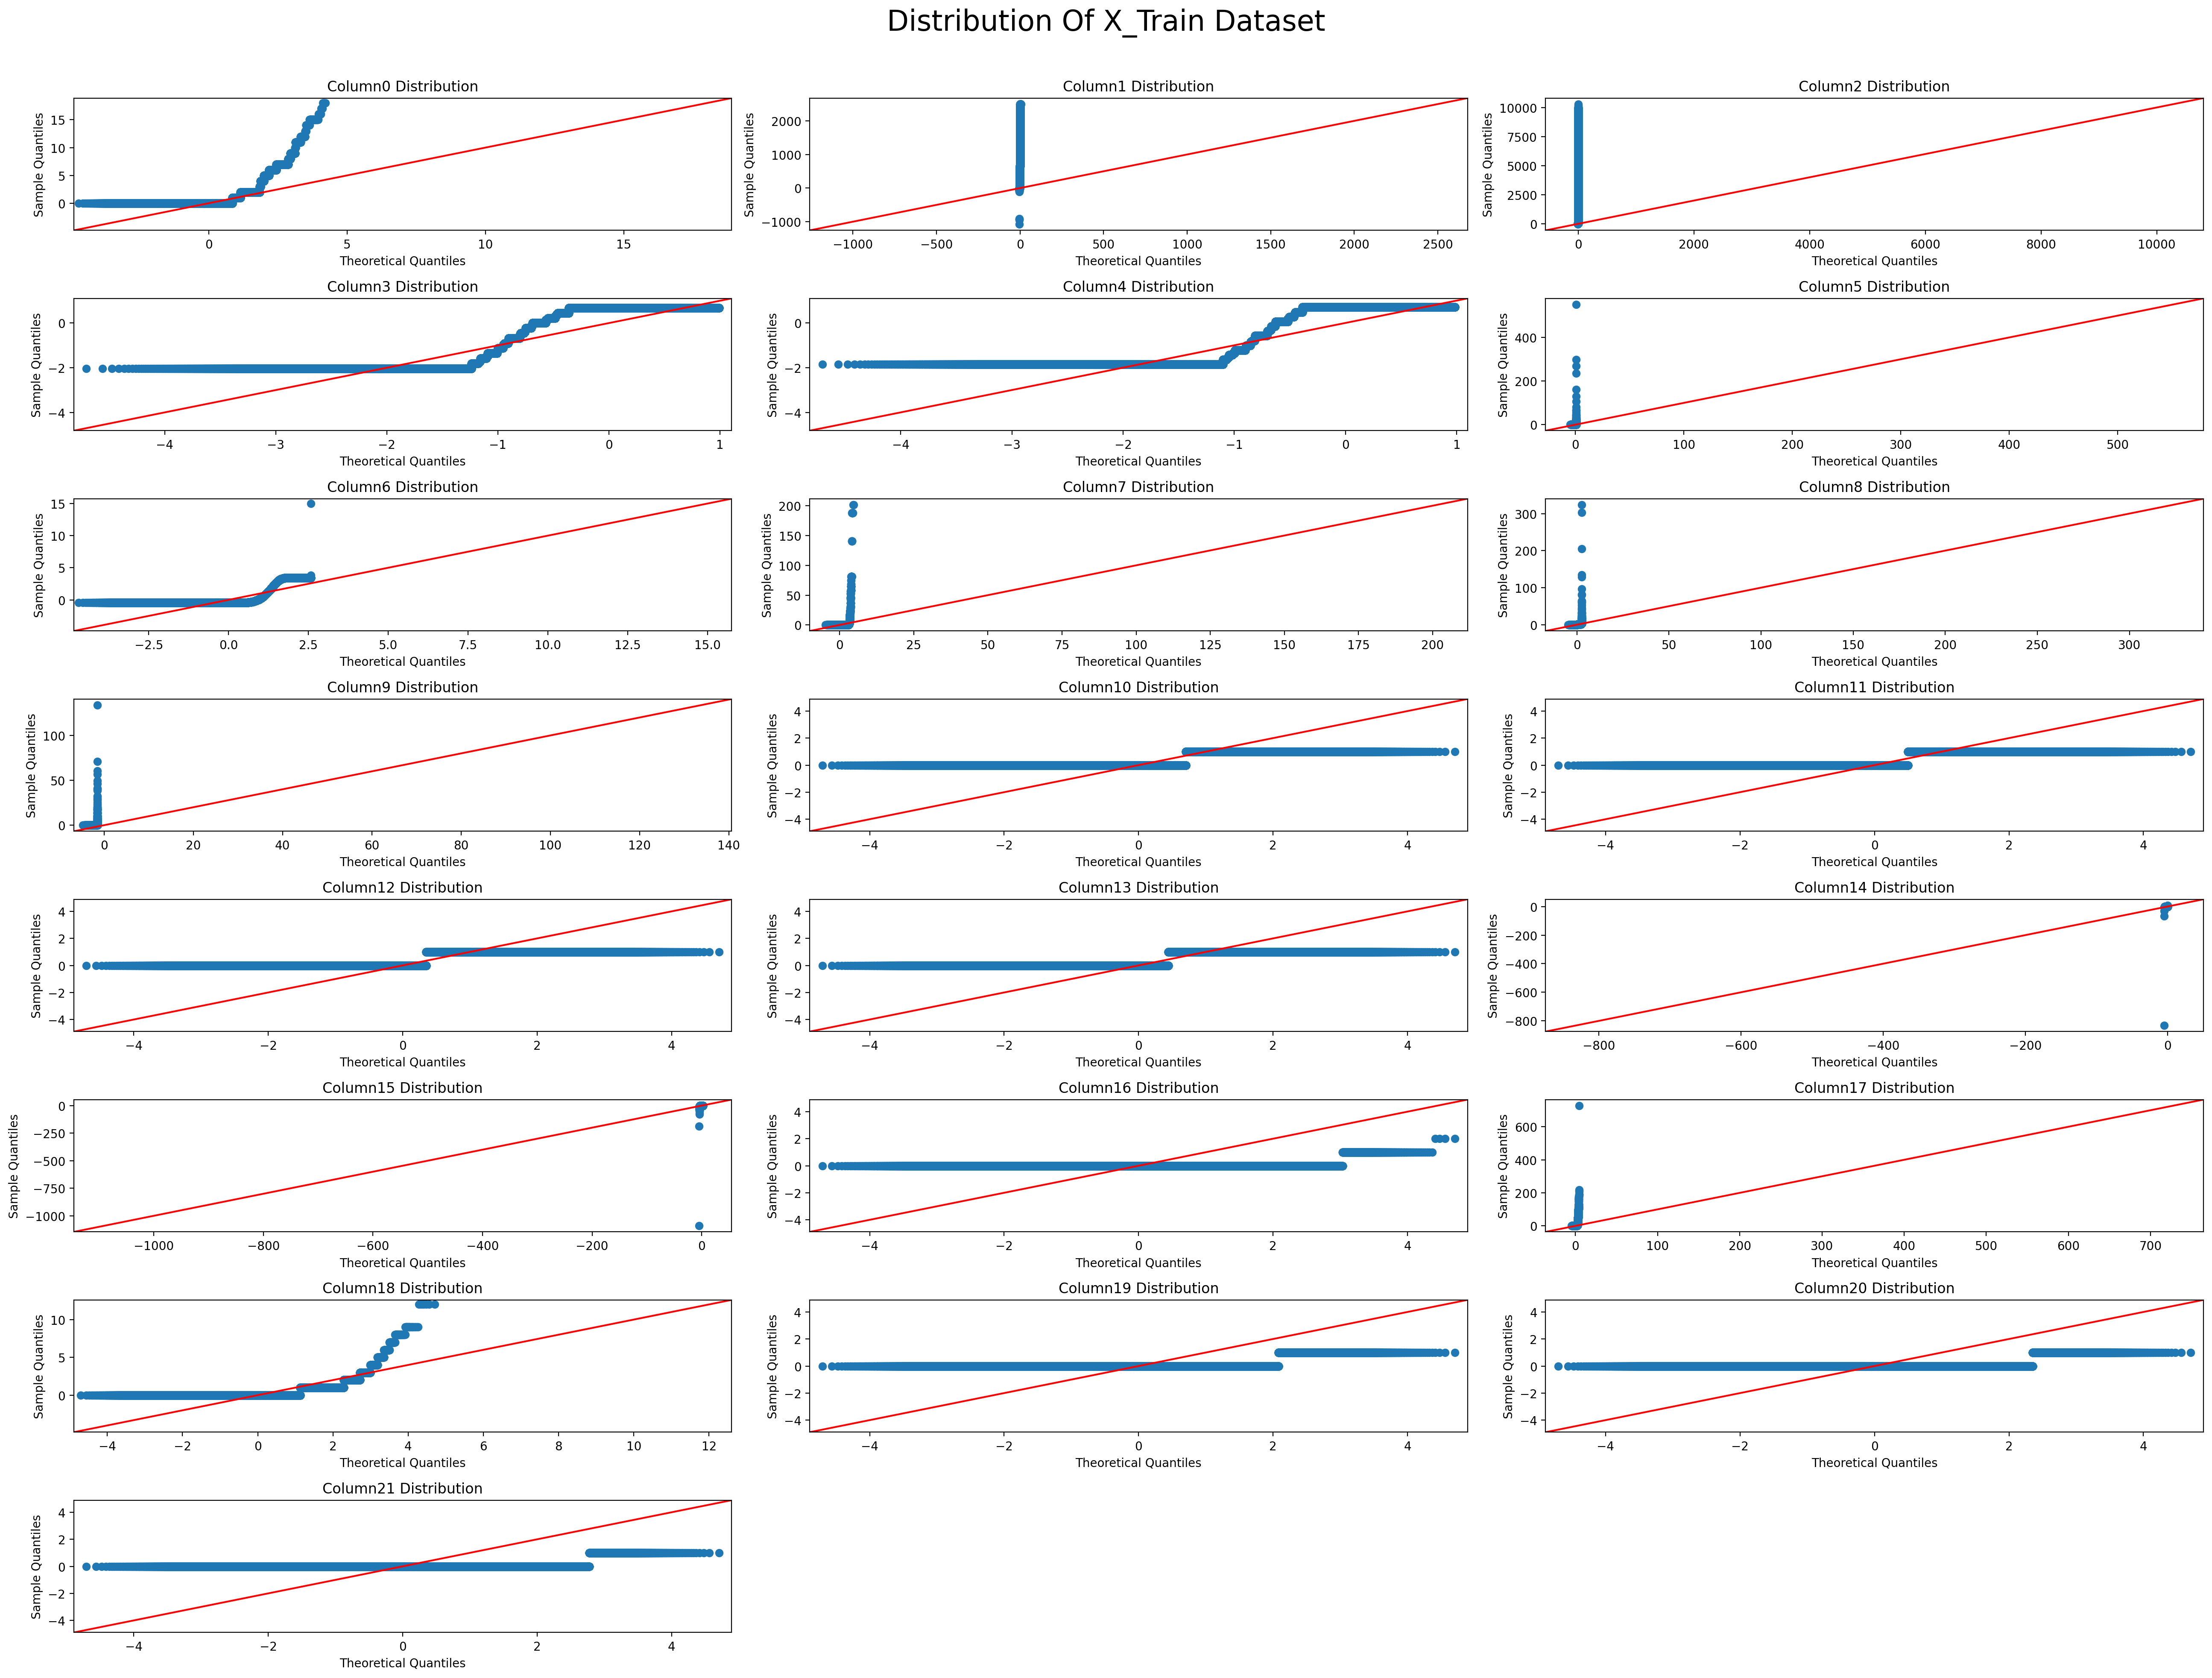

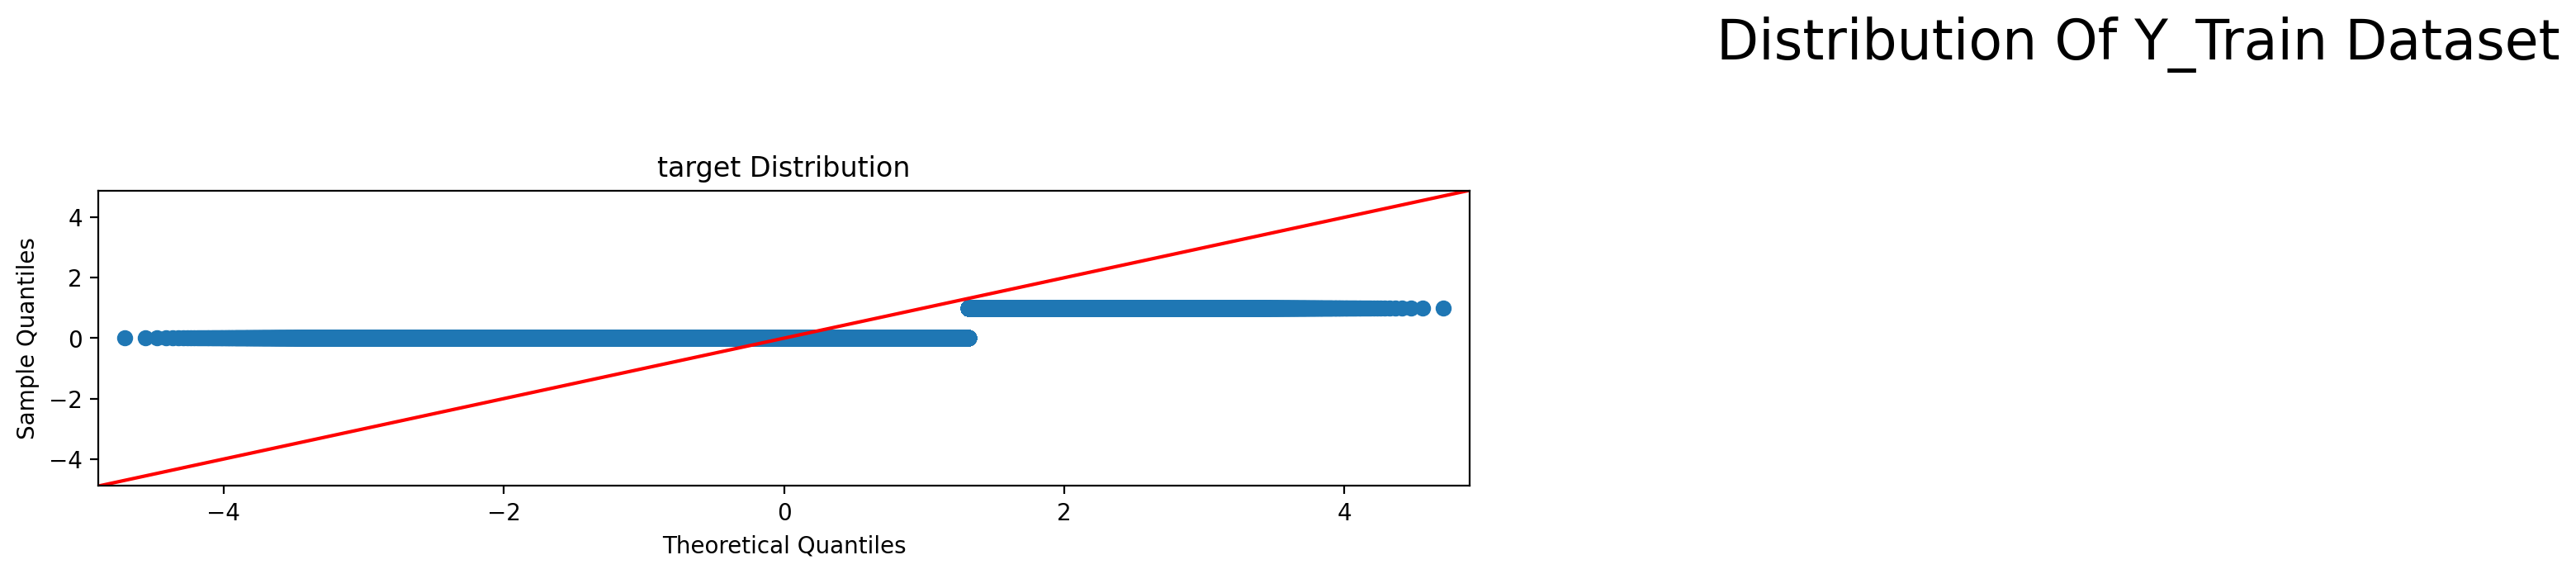

In [22]:
datasets = [x_train, y_train]
dataset_title = ['X_Train', 'Y_Train']

colors = ['summer', 'Set3']

for i, data in enumerate(datasets):
    draw_qqplot(data.select_dtypes('number'), data.select_dtypes('number').columns, 8, 3, dataset_title[i], colors[i])

In [23]:
concat_df = pd.concat([x_train, y_train['target']], axis = 1)
concat_df

ID  Column0  Column1  Column2   Column3  \
0       ad1a67e4cbddc767a3456b0d94299b9e      2.0     2495   3726.0  0.678139   
1       7246d2f76ac0c217ec25e72ea5f014cb      0.0     2495   3454.0  0.452580   
2       22ba388e7dd14c13342c49e75fc29dda      2.0     2495   4543.0 -1.577453   
3       59f9b981472d97342587fb3e6392aeb1      0.0      211     59.0       NaN   
4       f6317cf7ecf126859804eddff279aead      0.0      718    950.0 -2.028572   
...                                  ...      ...      ...      ...       ...   
785128  01b7d7be203dbf2a3d75c9770d68dfb6      0.0      304   1126.0  0.678139   
785129  c7993f2c4c15f46f366f6daaa747197d      0.0     2495   2265.0  0.678139   
785130  a34b544f113a6d3b4eb353909a378afb      0.0     2495   3760.0  0.678139   
785131  fe5b1826c9e7c1864886b233402df330      0.0     2480   4493.0  0.001462   
785132  c3862b6625043b647d275e9825a7d6ea      0.0     2495   4202.0  0.678139   

         Column4   Column5   Column6   Column7   Column8  ...  Column13  \
0       0.701403 -0.007468  0.434190 -0.015603  0.606265  ...         0   
1       0.701403 -0.007468  1.554998 -0.015574  0.329946  ...         0   
2      -1.429540 -0.007469 -0.407939 -0.015607 -0.774979  ...         1   
3            NaN       NaN -0.407939 -0.015607 -0.774979  ...         0   
4      -1.855728       NaN -0.407939 -0.015607 -0.774979  ...         0   
...          ...       ...       ...       ...       ...  ...       ...   
785128  0.701403 -0.007469 -0.407939 -0.015607 -0.774979  ...         0   
785129  0.701403 -0.007468 -0.407939 -0.015607  0.509591  ...         1   
785130  0.701403 -0.007469 -0.407939 -0.015607  0.218972  ...         1   
785131  0.062121 -0.007468 -0.407939 -0.015607  0.400071  ...         1   
785132  0.701403 -0.007467  3.440511 -0.015603  0.471097  ...         0   

        Column14  Column15  Column16  Column17  Column18  Column19  Column20  \
0       0.001351   0.00339       0.0         0       0.0         0         0   
1       0.001351   0.00339       0.0         0       0.0         0         0   
2       0.001351   0.00339       0.0         0       0.0         0         0   
3            NaN   0.00339       0.0         0       1.0         0         0   
4            NaN   0.00339       0.0         0       0.0         0         0   
...          ...       ...       ...       ...       ...       ...       ...   
785128       NaN   0.00339       0.0         0       1.0         0         0   
785129  0.001351   0.00339       0.0         0       0.0         0         0   
785130  0.001351   0.00339       0.0         0       0.0         0         0   
785131  0.001351   0.00339       0.0         0       0.0         0         0   
785132       NaN   0.00339       0.0         0       0.0         0         0   

        Column21  target  
0              0       0  
1              0       0  
2              0       0  
3              0       1  
4              0       0  
...          ...     ...  
785128         0       0  
785129         0       0  
785130         0       0  
785131         0       0  
785132         0       0  

[785133 rows x 24 columns]

In [24]:
concat_df.drop(['Column9', 'Column14'], axis=1, inplace=True)
concat_df.shape

(785133, 22)

# Train Test Split

In [25]:
IDs = y_train['ID']

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42, stratify=y_train['target'])
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((628106, 23), (157027, 23), (628106, 2), (157027, 2))

In [26]:
x_train.reset_index(drop=True, inplace=True)
x_val.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [27]:
x_train.drop(['ID', 'Column9', 'Column14'], axis=1, inplace=True)
x_val.drop(['ID', 'Column9', 'Column14'], axis=1, inplace=True)
x_test.drop(['ID', 'Column9', 'Column14'], axis=1, inplace=True)
# x_train.drop(['ID', 'Column4', 'Column10', 'Column11','Column13',   'Column9', 'Column14'], axis=1, inplace=True)
# x_val.drop(['ID', 'Column4', 'Column10', 'Column11','Column13',   'Column9', 'Column14'], axis=1, inplace=True)
# x_test.drop(['ID', 'Column4', 'Column10', 'Column11','Column13',   'Column9', 'Column14'], axis=1, inplace=True)

In [28]:
y_train['target'] = y_train['target'].astype('category')
y_val['target'] = y_val['target'].astype('category')

In [29]:
x_train.isna().sum()

Column0          6
Column1          0
Column2          0
Column3     100933
Column4     102087
Column5     133761
Column6       3070
Column7          0
Column8       3070
Column10         0
Column11         0
Column12         0
Column13         0
Column15     13152
Column16         0
Column17         0
Column18         0
Column19         0
Column20         0
Column21         0
dtype: int64

# Data Preprocessing

In [30]:
# Impute missing values
imputer = SimpleImputer(strategy='median')
# imputer = KNNImputer(n_neighbors=5)

x_imputed = imputer.fit_transform(x_train[x_train.select_dtypes('number').columns])
x_imputed = pd.DataFrame(x_imputed, columns = x_train.select_dtypes('number').columns)
x_train_imput = pd.concat([y_train['ID'], x_imputed], axis = 1)

x_val_imputed = imputer.transform(x_val[x_val.select_dtypes('number').columns])
x_val_imputed = pd.DataFrame(x_val_imputed, columns = x_val.select_dtypes('number').columns)
x_val_imput = pd.concat([y_val['ID'], x_val_imputed], axis = 1)

x_test_imputed = imputer.transform(x_test[x_test.select_dtypes('number').columns])
x_test_imputed = pd.DataFrame(x_test_imputed, columns = x_test.select_dtypes('number').columns)
x_test_imput = pd.concat([y_test['ID'], x_test_imputed], axis = 1)

In [31]:
# from scipy.stats import boxcox

# # Function to apply Box-Cox and Log transformations
# def transform_skewed_columns(df: pd.DataFrame) -> pd.DataFrame:
#     """
#     Transforms skewed columns of a DataFrame using Box-Cox for left-skewed
#     and Log transformation for right-skewed columns.

#     Args:
#     df (pd.DataFrame): The input DataFrame with potential skewed distributions.

#     Returns:
#     pd.DataFrame: A DataFrame with transformed columns.
#     """
#     transformed_df = df.copy()  # Copy the DataFrame to avoid modifying the original

#     # Iterate through each column to check skewness
#     for col in df.select_dtypes(include=[np.number]).columns:
#         skewness = df[col].skew()

#         if skewness <= -0.5:  # Left-skewed columns for Box-Cox transformation
#             print(f"Applying Box-Cox transformation to left-skewed column: {col}")

#             # Ensure all values are positive by shifting the data
#             min_value = df[col].min()
#             if min_value <= 0:
#                 transformed_df[col] = df[col] - min_value + 1  # Shifting to make all values positive
#             else:
#                 transformed_df[col] = df[col]  # Already positive
            
#             # Apply Box-Cox transformation (requires strictly positive values)
#             transformed_df[col], _ = boxcox(transformed_df[col])

#         elif skewness >= 0.5:  # Right-skewed columns for Log transformation
#             print(f"Applying Log transformation to right-skewed column: {col}")

#             # Ensure all values are positive
#             transformed_df[col] = df[col] + 1e-9  # Adding a small constant to avoid log(0)
#             transformed_df[col] = np.log(transformed_df[col])

#         else:
#             transformed_df[col] = df[col]  # No transformation for normally distributed columns

#         # Check for NaN or infinite values and replace them if necessary
#         transformed_df[col].replace([np.inf, -np.inf], np.nan, inplace=True)
#         if transformed_df[col].isnull().any():
#             print(f"Warning: Column {col} contains NaN values after transformation. Filling NaN with median.")
#             transformed_df[col].fillna(transformed_df[col].median(), inplace=True)

#     return transformed_df

# # Apply transformations to each dataset
# x_train_transformed = transform_skewed_columns(x_train_imput)
# x_val_transformed = transform_skewed_columns(x_val_imput)
# x_test_transformed = transform_skewed_columns(x_test_imput)

# # Save the transformed datasets
# x_train_imput = x_train_transformed.copy()
# x_val_imput = x_val_transformed.copy()
# x_test_imput = x_test_transformed.copy()

In [32]:
# import pandas as pd

# def calculate_iqr_bounds(df):
#     # Calculate Q1 (25th percentile) and Q3 (75th percentile)
#     Q1 = df.quantile(0.25)
#     Q3 = df.quantile(0.75)
    
#     # Calculate IQR
#     IQR = Q3 - Q1
    
#     # Calculate lower and upper bounds
#     lower_bound = Q1 - 1.5 * IQR
#     upper_bound = Q3 + 1.5 * IQR
    
#     return lower_bound, upper_bound

# def cap_outliers_iqr(df, lower_bound, upper_bound):
#     # Cap the outliers in the DataFrame using the provided bounds
#     # Ensure that lower_bound and upper_bound are aligned with df columns
#     df_capped = df.copy()
    
#     for col in df.columns:
#         if col in lower_bound.index and col in upper_bound.index:
#             df_capped[col] = df_capped[col].clip(lower=lower_bound[col], upper=upper_bound[col])
    
#     return df_capped

# # Assuming x_train_transformed is your training DataFrame
# lower_bound, upper_bound = calculate_iqr_bounds(x_train_imput)

# # Cap outliers in x_val and x_test using the bounds from x_train
# x_train_capped = cap_outliers_iqr(x_train_imput.copy(), lower_bound, upper_bound)
# x_val_capped = cap_outliers_iqr(x_val_imput.copy(), lower_bound, upper_bound)
# x_test_capped = cap_outliers_iqr(x_test_imput.copy(), lower_bound, upper_bound)

# x_train_imput = x_train_capped.copy()
# x_val_imput = x_val_capped.copy()
# x_test_imput = x_test_capped.copy()

In [33]:
# Initialize the StandardScaler
sc = StandardScaler()

# Apply the scaler to the numerical columns in the training data
x_train_imput_scaled = sc.fit_transform(x_train_imput.select_dtypes('number'))

# Apply the scaler to the numerical columns in the validation data
x_val_imput_scaled = sc.transform(x_val_imput.select_dtypes('number'))

# Apply the scaler to the numerical columns in the validation data
x_test_imput_scaled = sc.transform(x_test_imput.select_dtypes('number'))

# If you want to keep the scaled data in DataFrame format, you can do:
x_train_imput_scaled_df = pd.DataFrame(x_train_imput_scaled, columns=x_train_imput.select_dtypes('number').columns)
x_val_imput_scaled_df = pd.DataFrame(x_val_imput_scaled, columns=x_val_imput.select_dtypes('number').columns)
x_test_imput_scaled_df = pd.DataFrame(x_test_imput_scaled, columns=x_val_imput.select_dtypes('number').columns)

x_train_imput = x_train_imput_scaled_df.copy()
x_val_imput = x_val_imput_scaled_df.copy()
x_test_imput = x_test_imput_scaled_df.copy()

In [34]:
# # Set the number of components to retain 95% variance
# pca = PCA(n_components=0.98)

# # Apply PCA to the scaled training data
# x_train_pca = pca.fit_transform(x_train_imput)
# # Apply PCA to the scaled validation data
# x_val_pca = pca.transform(x_val_imput)
# # Apply PCA to the scaled test data
# x_test_pca = pca.transform(x_test_imput)

# # If you want to keep the PCA data in DataFrame format
# x_train_pca_df = pd.DataFrame(x_train_pca)
# # If you want to keep the PCA data in DataFrame format
# x_val_pca_df = pd.DataFrame(x_val_pca)
# # If you want to keep the PCA data in DataFrame format
# x_test_pca_df = pd.DataFrame(x_test_pca)

# # Optional: To keep track of the PCA components' names, you can create new columns
# # This assumes that you want to name them as 'PC1', 'PC2', etc.
# x_train_pca_df.columns = [f'PC{i+1}' for i in range(x_train_pca_df.shape[1])]
# x_val_pca_df.columns = [f'PC{i+1}' for i in range(x_val_pca_df.shape[1])]
# x_test_pca_df.columns = [f'PC{i+1}' for i in range(x_test_pca_df.shape[1])]

# # Now your PCA-transformed data is in x_train_pca_df, x_val_pca_df, and x_test_pca_df
# x_train_imput = x_train_pca_df.copy()
# x_val_imput = x_val_pca_df.copy()
# x_test_imput = x_test_pca_df.copy()

In [35]:
# Oversample after imputation
smote = SMOTE(random_state=42)
X_imputed_resampled, y_imputed_resampled = smote.fit_resample(x_train_imput.select_dtypes('number'), y_train['target'])

# Convert back to DataFrame for convenience
x_train_imput = pd.DataFrame(X_imputed_resampled, columns=x_train_imput.select_dtypes('number').columns)
Y_train = pd.DataFrame(y_imputed_resampled, columns=['target'])

In [36]:


                        # Removed Due to PCA



# x_train_imput = pd.DataFrame(x_train_imput, columns=x_train.select_dtypes('number').columns)
# x_val_imput = pd.DataFrame(x_val_imput, columns=x_val.select_dtypes('number').columns)
# x_test_imput = pd.DataFrame(x_test_imput, columns=x_test.select_dtypes('number').columns)

In [37]:
datasets = [x_train_imput, 
            Y_train, 
            x_val_imput, 
            y_val, 
            x_test_imput, 
            y_test]

dataset_title = ['X_Train', 
                 'Y_Train', 
                 'X_Val', 
                 'Y_Val', 
                 'X_Test',
                 'Y_test']

for i, data in enumerate(datasets):
    print(f"Dataset: {dataset_title[i]}")
    print(data.select_dtypes('number').skew())
    print(data.select_dtypes('number').var())

Dataset: X_Train
Column0       4.634415
Column1       0.787298
Column2       0.642299
Column3      -1.457456
Column4      -1.264268
Column5     252.638657
Column6       3.457712
Column7     167.112486
Column8      79.131827
Column10      1.642916
Column11      1.129500
Column12      0.998780
Column13      1.057371
Column15   -180.991018
Column16     13.373211
Column17     12.812683
Column18      2.342775
Column19      3.456082
Column20      5.802829
Column21      9.130234
dtype: float64
Column0     0.738269
Column1     0.996466
Column2     0.912402
Column3     0.969272
Column4     0.992848
Column5     1.647337
Column6     0.697909
Column7     0.553689
Column8     0.751835
Column10    0.817538
Column11    0.884700
Column12    0.864290
Column13    0.885019
Column15    2.869765
Column16    4.533857
Column17    4.670259
Column18    2.436206
Column19    3.413394
Column20    2.885673
Column21    4.188343
dtype: float64
Dataset: Y_Train
Series([], dtype: float64)
Series([], dtype: float64)
Da

In [38]:
# datasets = [x_train_imput, 
#             Y_train, 
#             x_val_imput, 
#             y_val, 
#             x_test_imput, 
#             y_test]

# dataset_title = ['X_Train', 
#                  'Y_Train', 
#                  'X_Val', 
#                  'Y_Val', 
#                  'X_Test',
#                  'Y_test']

# colors = ['summer', 
#           'Set3', 
#           'summer', 
#           'Set3', 
#           'summer', 
#           'Set3']

# for i, data in enumerate(datasets):
#     draw_distplot(data.select_dtypes('number'), data.select_dtypes('number').columns, 8, 3, dataset_title[i], colors[i])





                        # Visualize here PCA Without PCA Distribution







# Model Building

In [39]:
xgb_params = {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
lightbgm_params = {'lambda_l1': 3.962980604776118, 'lambda_l2': 1.5075196212131254, 'num_leaves': 90, 'feature_fraction': 0.9675647296514234, 'bagging_fraction': 0.9979919873256766, 'bagging_freq': 2, 'min_child_samples': 63}
catboost_params =  {
    'iterations': 700,
    'learning_rate': 0.12851432422429102,
    'l2_leaf_reg': 0.8373406120034129,
    'border_count': 171,
    'bagging_temperature': 22.360639700244604,
    'random_strength': 1.3991869546371338,
    'boosting_type': 'Plain',
    'depth': 9,
    'grow_policy': 'SymmetricTree',
    'eval_metric': 'F1', 
}

In [40]:
models = {
    # 'LogisticRegression': LogisticRegression(),
    # 'DecisionTreeClassifier': DecisionTreeClassifier(),
    # 'RandomForestClassifier': RandomForestClassifier(),
    # 'GradientBoostingClassifier': GradientBoostingClassifier(),
    # 'AdaBoostClassifier': AdaBoostClassifier(),
    # 'BaggingClassifier': BaggingClassifier(),
    # 'ExtraTreesClassifier': ExtraTreesClassifier(),
    # 'MLPClassifier': MLPClassifier(),
    # 'XGBClassifier': XGBClassifier(learning_rate=0.1, max_depth=10, min_child_weight=17, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0),
    'XGBClassifier': XGBClassifier(**xgb_params),
    # 'XGBClassifier': XGBClassifier(),
    'CatBoostClassifier': CatBoostClassifier(**catboost_params, verbose = False),
    'LGBMClassifier': LGBMClassifier(**lightbgm_params, verbose = -1)
}

In [41]:
x_train_imput.shape

(1137760, 20)

In [42]:
Y_train['target'].shape

(1137760,)

# Model Training

In [43]:
for name, model in models.items():
    model.fit(x_train_imput.select_dtypes('number') , Y_train['target'])
    print(f'{name} Trained \n')
    print(' * ' * 35 +'\n')

XGBClassifier Trained 

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

CatBoostClassifier Trained 

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

LGBMClassifier Trained 

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 



In [44]:
results_train = {}
for name, model in models.items():
    
    prediction = model.predict(x_train_imput.select_dtypes('number'))
    probabilities = model.predict_proba(x_train_imput.select_dtypes('number'))
    
    # ROC AUC Score
    roc_auc = roc_auc_score(Y_train['target'], prediction)

    # Accuracy Score
    accuracy = accuracy_score(Y_train['target'], prediction)
    precision = precision_score(Y_train['target'], prediction)
    recall = recall_score(Y_train['target'], prediction)
    f1 = f1_score(Y_train['target'], prediction)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(Y_train['target'], prediction)
    
    conf = []
    conf.append(conf_matrix)
    
    logloss = log_loss(Y_train['target'], probabilities)
    
    results_train[name] = [roc_auc, accuracy, precision, recall, f1, logloss, conf]
    print(name + "'s Training Results Recorded")

XGBClassifier's Training Results Recorded
CatBoostClassifier's Training Results Recorded
LGBMClassifier's Training Results Recorded


# Training Results

In [45]:
def print_results(results, dataset):
    print('\n' + ' * ' * 30 + '\n')
    print('                                Dataset Name :', dataset)
    print('\n' + ' * ' * 30 + '\n')
    for (model, result) in zip(results.keys(), results.values()):
        print('Model Name :', model)
        print('ROC Score :', result[0])
        print('Accuracy Score :', result[1])
        print('Precision Score :', result[2])
        print('Recall Score :', result[3])
        print('F1 Score :', result[4])
        print('Log Loss :', result[5])
        print('\n' + ' * ' * 15 +'\n')

In [46]:
print_results(results_train, 'Training Dataset')


 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

                                Dataset Name : Training Dataset

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

Model Name : XGBClassifier
ROC Score : 0.9857931373927719
Accuracy Score : 0.9857931373927717
Precision Score : 0.9737966410873605
Recall Score : 0.9984531008297005
F1 Score : 0.9859707472200138
Log Loss : 0.04693734960252023

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

Model Name : CatBoostClassifier
ROC Score : 0.988563493179581
Accuracy Score : 0.9885634931795809
Precision Score : 0.9785101371825243
Recall Score : 0.9990683448178878
F1 Score : 0.9886823830663679
Log Loss : 0.0392169975032979

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

Model Name : LGBMClassifier
ROC Score : 0.9860682393474898
Accuracy Score : 0.9860682393474898
Precision Score : 0.9746076753682094
Recall Score : 0.9981419631556743
F1 Score : 0.9862344409060554
Log

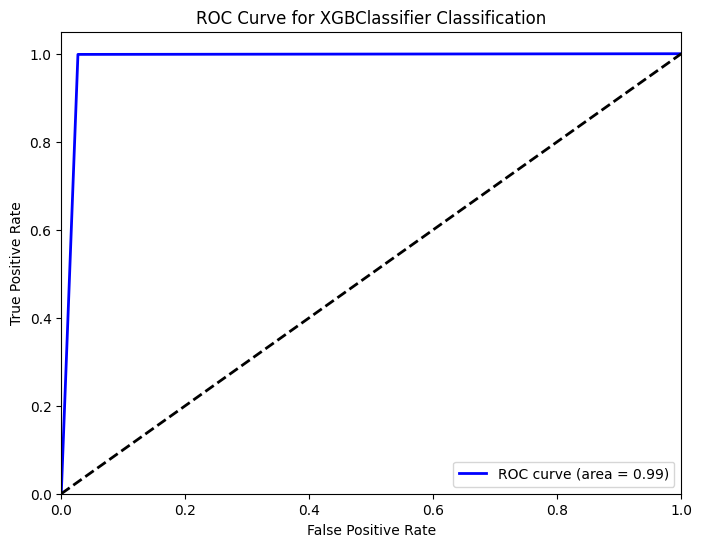

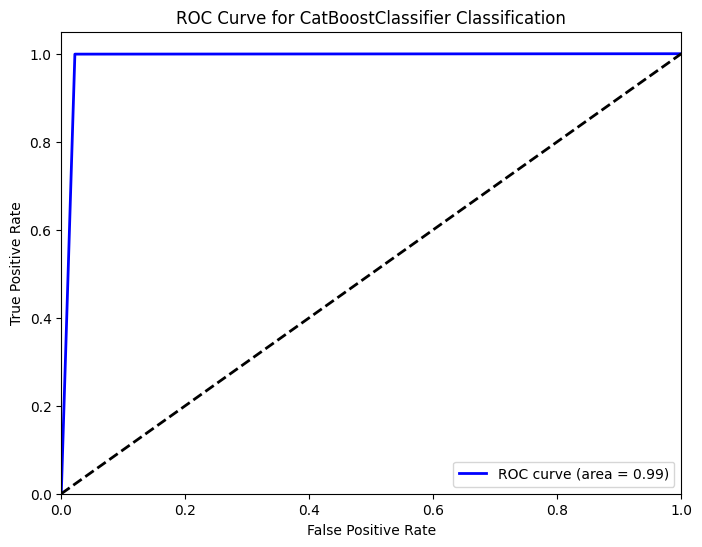

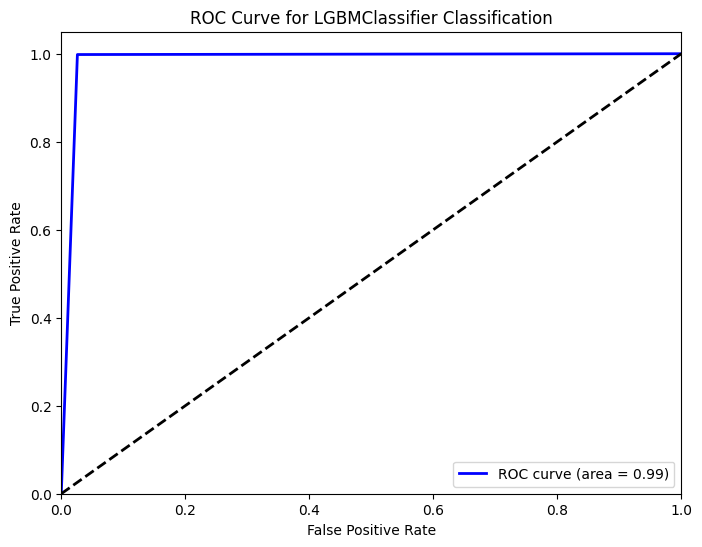

In [47]:
for name, model in models.items():
    
    # Predict probabilities for the positive class
    prediction = model.predict(x_train_imput.select_dtypes('number')) 
    
    # Compute ROC curve and ROC area for the positive class
    fpr, tpr, _ = roc_curve(Y_train['target'], prediction)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))

    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {0:0.2f})'.format(roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for ' + name + ' Classification')
    plt.legend(loc="lower right")
    plt.show()

In [48]:
def confusion_matrix_from_results(results, nrows, ncols, cmap):
    fig = plt.figure(figsize = (25, 25), dpi = 200)
    fig.suptitle('Confusion Matrix for Each Model', fontsize = 30)

    for i, (name, conf) in enumerate(zip(results.keys(), results.values())):
        ax = fig.add_subplot(nrows, ncols, i + 1)
        sns.heatmap(conf[6][0], annot = True, cmap = cmap[i], cbar = True, ax = ax)
        ax.set_title(name + ' Confusion Matrix')
        
    plt.tight_layout(rect = [0, 0, 1, 0.97])
    plt.show()

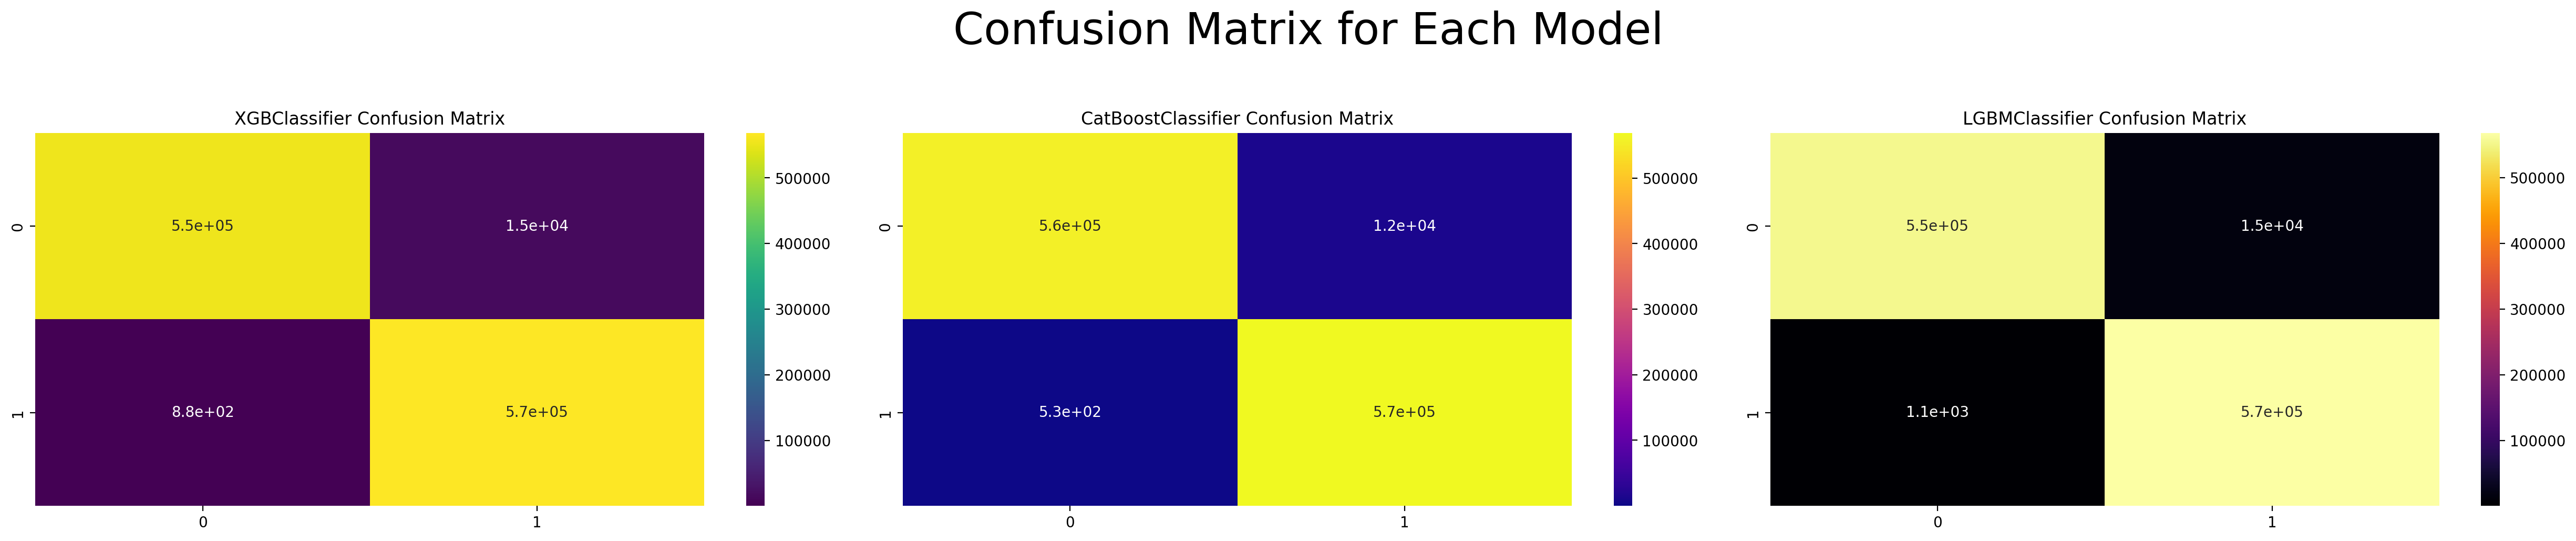

In [49]:
cmap_list = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'twilight', 'twilight_shifted', 'seismic', 'coolwarm', 'PiYG', 'bone', 'spring', 'summer', 'autumn', 'winter', 'hot', 'gray']

confusion_matrix_from_results(results_train, 6, 3, cmap_list)

In [50]:
for name, model in models.items():
    y_pred = model.predict(x_train_imput.select_dtypes('number'))
    print(f"Classification Report for {name}: \n")
    print(classification_report(Y_train['target'], y_pred))
    print("="*60)

Classification Report for XGBClassifier: 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    568880
           1       0.97      1.00      0.99    568880

    accuracy                           0.99   1137760
   macro avg       0.99      0.99      0.99   1137760
weighted avg       0.99      0.99      0.99   1137760

Classification Report for CatBoostClassifier: 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    568880
           1       0.98      1.00      0.99    568880

    accuracy                           0.99   1137760
   macro avg       0.99      0.99      0.99   1137760
weighted avg       0.99      0.99      0.99   1137760

Classification Report for LGBMClassifier: 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    568880
           1       0.97      1.00      0.99    568880

    accuracy                           0.99   1

# Validation Results

In [51]:
results_val = {}
for name, model in models.items():
    
    val_prediction = model.predict(x_val_imput.select_dtypes('number'))
    probabilities = model.predict_proba(x_val_imput.select_dtypes('number'))
    
    # ROC AUC Score
    roc_auc = roc_auc_score(y_val['target'], val_prediction)

    # Accuracy Score
    accuracy = accuracy_score(y_val['target'], val_prediction)
    precision = precision_score(y_val['target'], val_prediction)
    recall = recall_score(y_val['target'], val_prediction)
    f1 = f1_score(y_val['target'], val_prediction)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_val['target'], val_prediction)
    conf = []
    conf.append(conf_matrix)

    logloss = log_loss(y_val['target'], probabilities)
        
    results_val[name] = [roc_auc, accuracy, precision, recall, f1, logloss, conf]
    print(name + "'s Validation Results Recorded")

XGBClassifier's Validation Results Recorded
CatBoostClassifier's Validation Results Recorded
LGBMClassifier's Validation Results Recorded


In [52]:
print_results(results_val, 'Validation Dataset')


 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

                                Dataset Name : Validation Dataset

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

Model Name : XGBClassifier
ROC Score : 0.9797674070604235
Accuracy Score : 0.9740363122265597
Precision Score : 0.790094084567968
Recall Score : 0.9868305531167691
F1 Score : 0.8775712441067836
Log Loss : 0.06926239323344127

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

Model Name : CatBoostClassifier
ROC Score : 0.9746017157505795
Accuracy Score : 0.9750361402816076
Precision Score : 0.8031070772314717
Recall Score : 0.9740663199837915
F1 Score : 0.8803637917353354
Log Loss : 0.06698774140387906

 *  *  *  *  *  *  *  *  *  *  *  *  *  *  * 

Model Name : LGBMClassifier
ROC Score : 0.9782188194994981
Accuracy Score : 0.9743547288046005
Precision Score : 0.7940534642662302
Recall Score : 0.9829810224893631
F1 Score : 0.8784742131152489


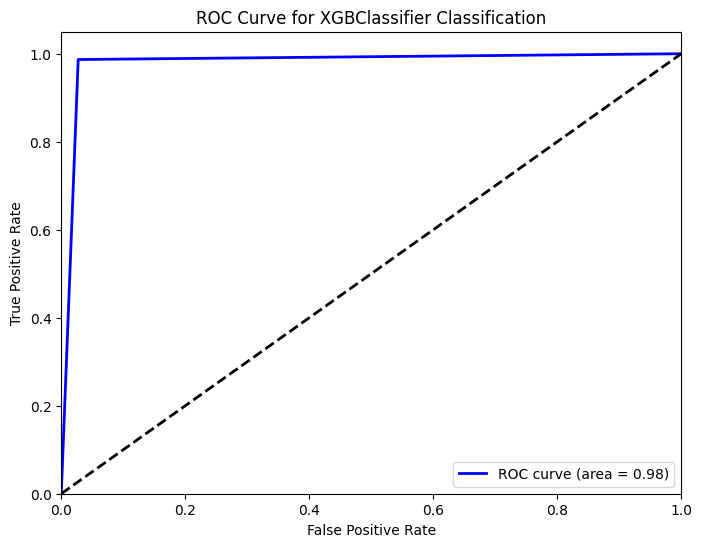

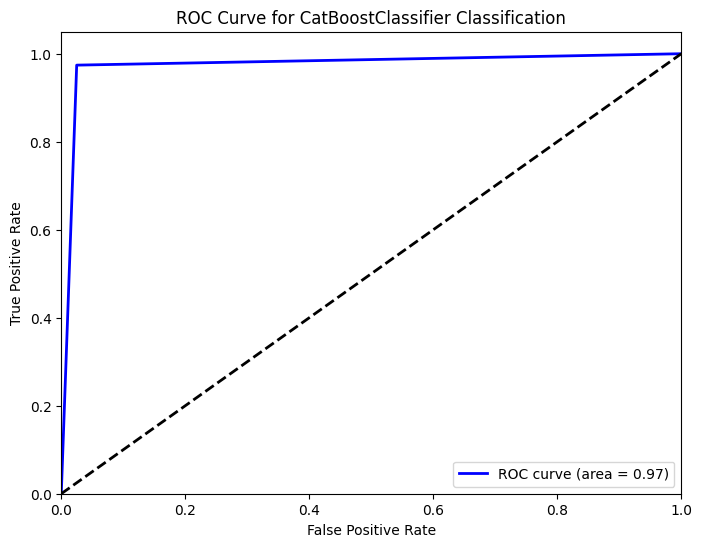

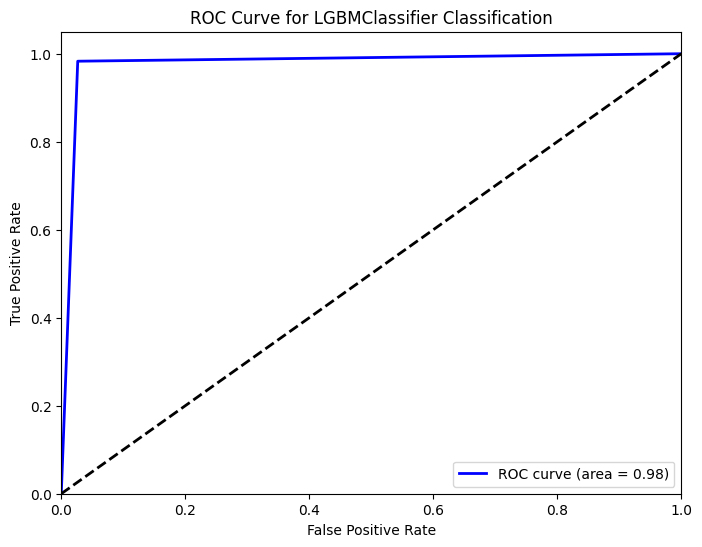

In [53]:
for name, model in models.items():
    
    # Predict probabilities for the positive class
    val_prediction = model.predict(x_val_imput.select_dtypes('number')) 
    
    # Compute ROC curve and ROC area for the positive class
    fpr, tpr, _ = roc_curve(y_val['target'], val_prediction)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))

    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {0:0.2f})'.format(roc_auc))
    
    plt.plot([0, 1], [0, 1], 'k--', lw=2)  # Diagonal line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for ' + name + ' Classification')
    plt.legend(loc="lower right")
    plt.show()

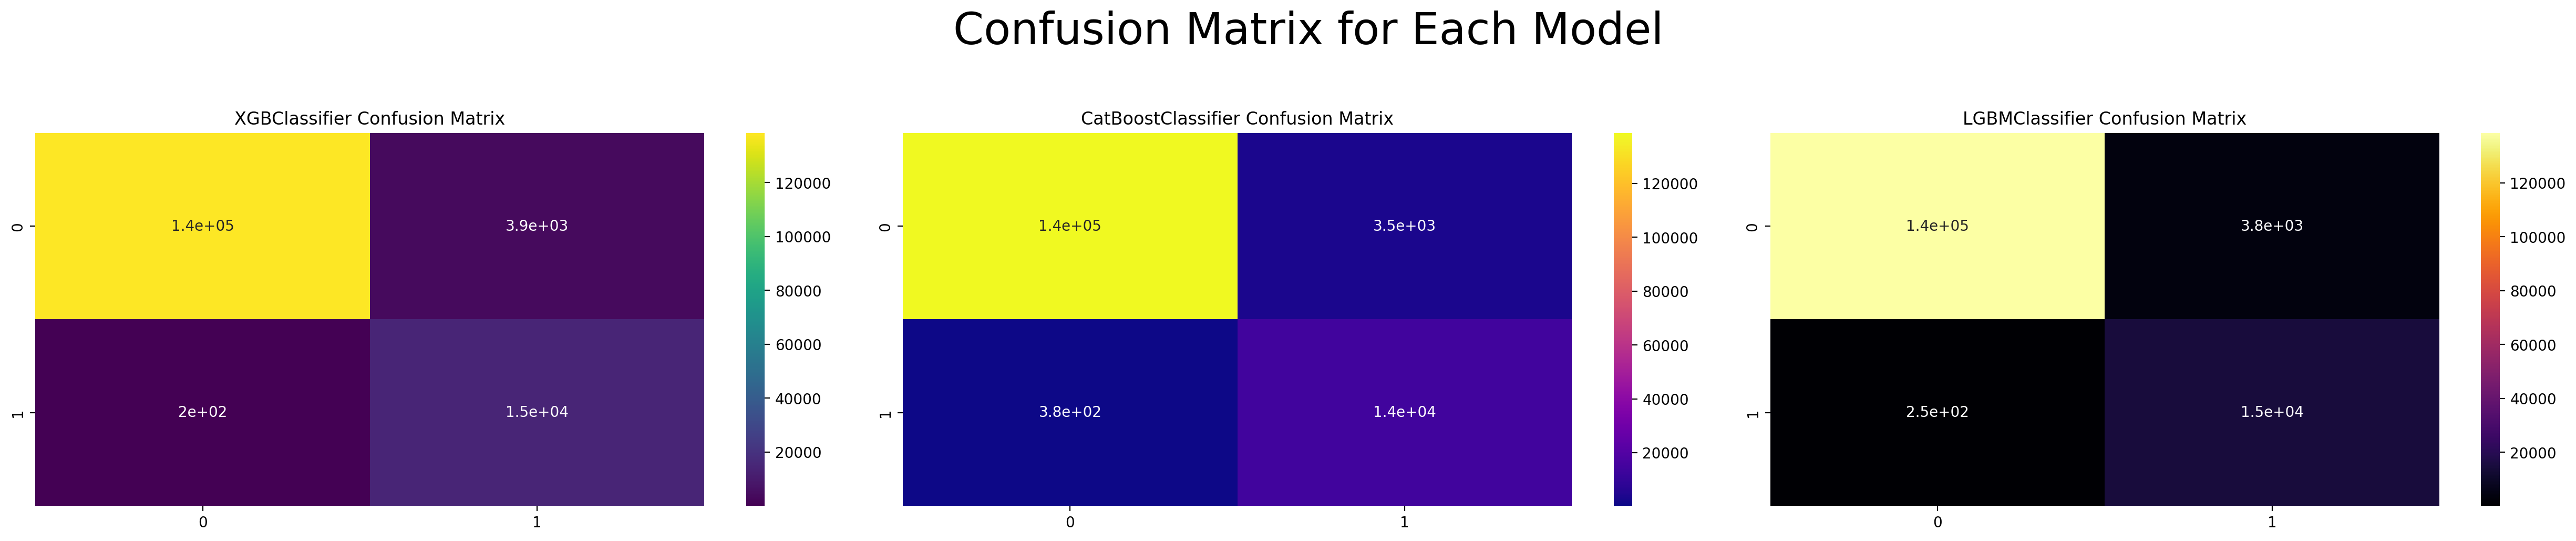

In [54]:
cmap_list = ['viridis', 'plasma', 'inferno', 'magma', 'cividis', 'twilight', 'twilight_shifted', 'seismic', 'coolwarm', 'PiYG', 'bone', 'spring', 'summer', 'autumn', 'winter', 'hot', 'gray']

confusion_matrix_from_results(results_val, 6, 3, cmap_list)

In [55]:
for name, model in models.items():
    y_pred = model.predict(x_val_imput.select_dtypes('number'))
    print(f"Classification Report for {name}: \n")
    print(classification_report(y_val['target'], y_pred))
    print("="*60)

Classification Report for XGBClassifier: 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    142220
           1       0.79      0.99      0.88     14807

    accuracy                           0.97    157027
   macro avg       0.89      0.98      0.93    157027
weighted avg       0.98      0.97      0.98    157027

Classification Report for CatBoostClassifier: 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    142220
           1       0.80      0.97      0.88     14807

    accuracy                           0.98    157027
   macro avg       0.90      0.97      0.93    157027
weighted avg       0.98      0.98      0.98    157027

Classification Report for LGBMClassifier: 

              precision    recall  f1-score   support

           0       1.00      0.97      0.99    142220
           1       0.79      0.98      0.88     14807

    accuracy                           0.97    

In [56]:
base_acc = 0.96
threshold_of_overfitting = 0.1

filtered_models = [model for model in results_val if results_val[model][1] > base_acc and abs(results_val[model][1] - results_train[model][1]) < threshold_of_overfitting]

print("Filtered models:", filtered_models)

Filtered models: ['XGBClassifier', 'CatBoostClassifier', 'LGBMClassifier']


In [57]:
base_roc = 0.96
threshold_of_overfitting = 0.1

filtered_models = [model for model in results_val if results_val[model][0] > base_roc and abs(results_val[model][0] - results_train[model][0]) < threshold_of_overfitting]

print("Filtered models:", filtered_models)

Filtered models: ['XGBClassifier', 'CatBoostClassifier', 'LGBMClassifier']


# Best Model Parameters

In [58]:
results_val['XGBClassifier']

[0.9797674070604235,
 0.9740363122265597,
 0.790094084567968,
 0.9868305531167691,
 0.8775712441067836,
 0.06926239323344127,
 [array([[138338,   3882],
         [   195,  14612]], dtype=int64)]]

In [59]:
results_val['CatBoostClassifier']

[0.9746017157505795,
 0.9750361402816076,
 0.8031070772314717,
 0.9740663199837915,
 0.8803637917353354,
 0.06698774140387906,
 [array([[138684,   3536],
         [   384,  14423]], dtype=int64)]]

In [60]:
results_val['LGBMClassifier']

[0.9782188194994981,
 0.9743547288046005,
 0.7940534642662302,
 0.9829810224893631,
 0.8784742131152489,
 0.06827327850604616,
 [array([[138445,   3775],
         [   252,  14555]], dtype=int64)]]

# Model Ensembling Results

In [61]:
# Step 1: Make predictions using the 3 models
xgb_pred = models['XGBClassifier'].predict(x_test_imput)
catboost_pred = models['CatBoostClassifier'].predict(x_test_imput)
lgbm_pred = models['LGBMClassifier'].predict(x_test_imput)

# Step 2: Create a DataFrame with predictions from all models
predictions_df_majority = pd.DataFrame({
    'XGBoost_Pred': xgb_pred,
    'CatBoost_Pred': catboost_pred,
    'LightGBM_Pred': lgbm_pred
})

# Step 3: Ensemble (majority voting)
# Here we take the mode (most frequent value) across the rows to get the ensemble prediction
predictions_df_majority['Ensemble_Majority'] = predictions_df_majority.mode(axis=1)[0]

# Step 4: Calculate evaluation metrics on the ensemble predictions
ensemble_pred = predictions_df_majority['Ensemble_Majority']

predictions_df_majority

XGBoost_Pred  CatBoost_Pred  LightGBM_Pred  Ensemble_Majority
0                  0              0              0                  0
1                  0              0              0                  0
2                  0              0              0                  0
3                  0              0              0                  0
4                  0              0              0                  0
...              ...            ...            ...                ...
261707             0              0              0                  0
261708             0              0              0                  0
261709             0              0              0                  0
261710             0              0              0                  0
261711             0              0              0                  0

[261712 rows x 4 columns]

In [62]:
# Step 1: Create a list to store evaluation metrics
metrics_list = []

# Evaluate XGBoost predictions
xgb_pred = predictions_df_majority['XGBoost_Pred']
xgb_accuracy = accuracy_score(y_test['target'], xgb_pred)
xgb_precision = precision_score(y_test['target'], xgb_pred)
xgb_recall = recall_score(y_test['target'], xgb_pred)
xgb_f1 = f1_score(y_test['target'], xgb_pred)
xgb_roc_auc = roc_auc_score(y_test['target'], xgb_pred)
DenScore = (xgb_accuracy + xgb_precision + xgb_recall + xgb_f1 + xgb_roc_auc) / 5

metrics_list.append({'Model': 'XGBoost',
                     'Accuracy': xgb_accuracy,
                     'Precision': xgb_precision,
                     'Recall': xgb_recall,
                     'F1-Score': xgb_f1,
                     'ROC AUC': xgb_roc_auc,
                     'Den Score': DenScore})

# Evaluate CatBoost predictions
catboost_pred = predictions_df_majority['CatBoost_Pred']
catboost_accuracy = accuracy_score(y_test['target'], catboost_pred)
catboost_precision = precision_score(y_test['target'], catboost_pred)
catboost_recall = recall_score(y_test['target'], catboost_pred)
catboost_f1 = f1_score(y_test['target'], catboost_pred)
catboost_roc_auc = roc_auc_score(y_test['target'], catboost_pred)
DenScore = (catboost_accuracy + catboost_precision + catboost_recall + catboost_f1 + catboost_roc_auc) / 5

metrics_list.append({'Model': 'CatBoost',
                     'Accuracy': catboost_accuracy,
                     'Precision': catboost_precision,
                     'Recall': catboost_recall,
                     'F1-Score': catboost_f1,
                     'ROC AUC': catboost_roc_auc,
                     'Den Score': DenScore})

# Evaluate LightGBM predictions
lgbm_pred = predictions_df_majority['LightGBM_Pred']
lgbm_accuracy = accuracy_score(y_test['target'], lgbm_pred)
lgbm_precision = precision_score(y_test['target'], lgbm_pred)
lgbm_recall = recall_score(y_test['target'], lgbm_pred)
lgbm_f1 = f1_score(y_test['target'], lgbm_pred)
lgbm_roc_auc = roc_auc_score(y_test['target'], lgbm_pred)
DenScore = (lgbm_accuracy + lgbm_precision + lgbm_recall + lgbm_f1 + lgbm_roc_auc) / 5

metrics_list.append({'Model': 'LightGBM',
                     'Accuracy': lgbm_accuracy,
                     'Precision': lgbm_precision,
                     'Recall': lgbm_recall,
                     'F1-Score': lgbm_f1,
                     'ROC AUC': lgbm_roc_auc,
                     'Den Score': DenScore})

# Step 2: Convert metrics list to DataFrame
metrics = pd.DataFrame(metrics_list)

# Print the evaluation metrics for each model
print("Individual Model Results Evaluation Metrics:")
print(metrics)

# Calculate and print confusion matrices for each model
print("\nConfusion Matrices:")
print("XGBoost Confusion Matrix:\n", confusion_matrix(y_test['target'], xgb_pred))
print("CatBoost Confusion Matrix:\n", confusion_matrix(y_test['target'], catboost_pred))
print("LightGBM Confusion Matrix:\n", confusion_matrix(y_test['target'], lgbm_pred))

# Step 3: Print classification reports for each model
print("\nClassification Reports:")
print("XGBoost Classification Report:\n", classification_report(y_test['target'], xgb_pred))
print("CatBoost Classification Report:\n", classification_report(y_test['target'], catboost_pred))
print("LightGBM Classification Report:\n", classification_report(y_test['target'], lgbm_pred))

Individual Model Results Evaluation Metrics:
      Model  Accuracy  Precision    Recall  F1-Score   ROC AUC  Den Score
0   XGBoost  0.973585   0.786301  0.988532  0.875895  0.980281   0.920919
1  CatBoost  0.974789   0.799417  0.978037  0.879752  0.976244   0.921648
2  LightGBM  0.974094   0.790968  0.985777  0.877692  0.979327   0.921572

Confusion Matrices:
XGBoost Confusion Matrix:
 [[230404   6630]
 [   283  24395]]
CatBoost Confusion Matrix:
 [[230978   6056]
 [   542  24136]]
LightGBM Confusion Matrix:
 [[230605   6429]
 [   351  24327]]

Classification Reports:
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99    237034
           1       0.79      0.99      0.88     24678

    accuracy                           0.97    261712
   macro avg       0.89      0.98      0.93    261712
weighted avg       0.98      0.97      0.97    261712

CatBoost Classification Report:
               precision    recall

In [63]:
# Accuracy
accuracy = accuracy_score(y_test['target'], ensemble_pred)

# Precision
precision = precision_score(y_test['target'], ensemble_pred)

# Recall
recall = recall_score(y_test['target'], ensemble_pred)

# F1-Score
f1 = f1_score(y_test['target'], ensemble_pred)

roc_auc = roc_auc_score(y_test['target'], ensemble_pred)

DenScore = (accuracy + precision + recall + f1 + roc_auc) / 5

# Classification Report
classification_rep = classification_report(y_test['target'], ensemble_pred)

# Step 8: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test['target'], ensemble_pred)

# Step 5: Output the results
print("Ensemble Model Performance:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Den Score: {DenScore}")

print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

Ensemble Model Performance:
Accuracy: 0.9742617839457113
Precision: 0.791588116752259
Recall: 0.986870897155361
F1-Score: 0.8785080441526585
ROC AUC: 0.9799099627823938
Den Score: 0.9222277609576766

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    237034
           1       0.79      0.99      0.88     24678

    accuracy                           0.97    261712
   macro avg       0.90      0.98      0.93    261712
weighted avg       0.98      0.97      0.98    261712


Confusion Matrix:
[[230622   6412]
 [   324  24354]]


In [64]:
# Step 1: Get predicted probabilities using the 3 models
xgb_prob = models['XGBClassifier'].predict_proba(x_test_imput)[:, 1]  # Probability of class 1
catboost_prob = models['CatBoostClassifier'].predict_proba(x_test_imput)[:, 1]  # Probability of class 1
lgbm_prob = models['LGBMClassifier'].predict_proba(x_test_imput)[:, 1]  # Probability of class 1

# Step 2: Create a DataFrame with probabilities from all models
prob_df = pd.DataFrame({
    'XGBoost_Prob': xgb_prob,
    'CatBoost_Prob': catboost_prob,
    'LightGBM_Prob': lgbm_prob
})

# Step 3: Ensemble (take the mean of the probabilities)
prob_df['Ensemble_Prob'] = prob_df.mean(axis=1)

# Step 4: Convert averaged probabilities to binary classes using a threshold of 0.5
prob_df['Ensemble_Pred'] = (prob_df['Ensemble_Prob'] >= 0.5).astype(int)

# Step 5: Calculate evaluation metrics on the ensemble predictions
ensemble_pred = prob_df['Ensemble_Pred']

# Accuracy
accuracy = accuracy_score(y_test['target'], ensemble_pred)

# Precision
precision = precision_score(y_test['target'], ensemble_pred)

# Recall
recall = recall_score(y_test['target'], ensemble_pred)

# F1-Score
f1 = f1_score(y_test['target'], ensemble_pred)

# ROC AUC (for binary classification)
roc_auc = roc_auc_score(y_test['target'], prob_df['Ensemble_Prob'])

DenScore = (accuracy + precision + recall + f1 + roc_auc) / 5

# Classification Report
classification_rep = classification_report(y_test['target'], ensemble_pred)

# Step 8: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test['target'], ensemble_pred)

# Step 6: Output the results
print("Ensemble Model Performance (Based on Probabilities):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Den Score: {DenScore}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

prob_df

Ensemble Model Performance (Based on Probabilities):
Accuracy: 0.9744757596136211
Precision: 0.7932225480612577
Recall: 0.9864656779317611
F1-Score: 0.879352694697298
ROC AUC: 0.9942574455701296
Den Score: 0.9255548251748135

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    237034
           1       0.79      0.99      0.88     24678

    accuracy                           0.97    261712
   macro avg       0.90      0.98      0.93    261712
weighted avg       0.98      0.97      0.98    261712


Confusion Matrix:
[[230688   6346]
 [   334  24344]]


XGBoost_Prob  CatBoost_Prob  LightGBM_Prob  Ensemble_Prob  \
0           0.000003   3.187385e-08       0.000037       0.000013   
1           0.000004   2.258158e-08       0.000039       0.000014   
2           0.000005   3.735947e-09       0.000040       0.000015   
3           0.000005   1.158518e-07       0.000043       0.000016   
4           0.000004   8.352285e-07       0.000041       0.000015   
...              ...            ...            ...            ...   
261707      0.000001   2.290419e-06       0.000030       0.000011   
261708      0.000004   5.223751e-09       0.000046       0.000017   
261709      0.000004   2.567144e-09       0.000036       0.000013   
261710      0.000004   2.680107e-09       0.000041       0.000015   
261711      0.000005   1.965158e-08       0.000037       0.000014   

        Ensemble_Pred  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
261707              0  
261708              0  
261709              0  
261710              0  
261711              0  

[261712 rows x 5 columns]

In [65]:
# Step 1: Calculate accuracy for each model on the validation set
xgb_val_pred = models['XGBClassifier'].predict(x_val_imput)
catboost_val_pred = models['CatBoostClassifier'].predict(x_val_imput)
lgbm_val_pred = models['LGBMClassifier'].predict(x_val_imput)

xgb_accuracy = accuracy_score(y_val['target'], xgb_val_pred)
catboost_accuracy = accuracy_score(y_val['target'], catboost_val_pred)
lgbm_accuracy = accuracy_score(y_val['target'], lgbm_val_pred)

# Store accuracies
accuracies = np.array([xgb_accuracy, catboost_accuracy, lgbm_accuracy])

# Step 2: Normalize the accuracies to use as weights
normalized_weights = accuracies / accuracies.sum()

# Step 3: Get predicted probabilities using the 3 models
xgb_prob = models['XGBClassifier'].predict_proba(x_test_imput)[:, 1]  # Probability of class 1
catboost_prob = models['CatBoostClassifier'].predict_proba(x_test_imput)[:, 1]  # Probability of class 1
lgbm_prob = models['LGBMClassifier'].predict_proba(x_test_imput)[:, 1]  # Probability of class 1

# Step 4: Create a DataFrame with probabilities from all models
prob_df = pd.DataFrame({
    'XGBoost_Prob': xgb_prob,
    'CatBoost_Prob': catboost_prob,
    'LightGBM_Prob': lgbm_prob
})

# Step 5: Ensemble (take the weighted mean of the probabilities)
prob_df['Ensemble_Prob'] = (prob_df['XGBoost_Prob'] * normalized_weights[0] +
                             prob_df['CatBoost_Prob'] * normalized_weights[1] +
                             prob_df['LightGBM_Prob'] * normalized_weights[2])

# Step 6: Convert averaged probabilities to binary classes using a threshold of 0.5
prob_df['Ensemble_Pred'] = (prob_df['Ensemble_Prob'] >= 0.5).astype(int)

# Step 7: Calculate evaluation metrics on the ensemble predictions
ensemble_pred = prob_df['Ensemble_Pred']

# Accuracy
accuracy = accuracy_score(y_test['target'], ensemble_pred)

# Precision
precision = precision_score(y_test['target'], ensemble_pred)

# Recall
recall = recall_score(y_test['target'], ensemble_pred)

# F1-Score
f1 = f1_score(y_test['target'], ensemble_pred)

# ROC AUC
roc_auc = roc_auc_score(y_test['target'], prob_df['Ensemble_Prob'])

DenScore = (accuracy + precision + recall + f1 + roc_auc) / 5

# Classification Report
classification_rep = classification_report(y_test['target'], ensemble_pred)

# Step 8: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test['target'], ensemble_pred)

# Step 8: Output the results
print("Ensemble Model Performance (Weighted by Accuracy):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Den Score: {DenScore}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

prob_df

Ensemble Model Performance (Weighted by Accuracy):
Accuracy: 0.9744757596136211
Precision: 0.7932225480612577
Recall: 0.9864656779317611
F1-Score: 0.879352694697298
ROC AUC: 0.9942574247137355
Den Score: 0.9255548210035347

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    237034
           1       0.79      0.99      0.88     24678

    accuracy                           0.97    261712
   macro avg       0.90      0.98      0.93    261712
weighted avg       0.98      0.97      0.98    261712


Confusion Matrix:
[[230688   6346]
 [   334  24344]]


XGBoost_Prob  CatBoost_Prob  LightGBM_Prob  Ensemble_Prob  \
0           0.000003   3.187385e-08       0.000037       0.000013   
1           0.000004   2.258158e-08       0.000039       0.000014   
2           0.000005   3.735947e-09       0.000040       0.000015   
3           0.000005   1.158518e-07       0.000043       0.000016   
4           0.000004   8.352285e-07       0.000041       0.000015   
...              ...            ...            ...            ...   
261707      0.000001   2.290419e-06       0.000030       0.000011   
261708      0.000004   5.223751e-09       0.000046       0.000017   
261709      0.000004   2.567144e-09       0.000036       0.000013   
261710      0.000004   2.680107e-09       0.000041       0.000015   
261711      0.000005   1.965158e-08       0.000037       0.000014   

        Ensemble_Pred  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
261707              0  
261708              0  
261709              0  
261710              0  
261711              0  

[261712 rows x 5 columns]

In [66]:
# Step 1: Calculate F1 score for each model on the validation set
xgb_val_pred = models['XGBClassifier'].predict(x_val_imput)
catboost_val_pred = models['CatBoostClassifier'].predict(x_val_imput)
lgbm_val_pred = models['LGBMClassifier'].predict(x_val_imput)

# Calculate F1 scores
xgb_f1 = f1_score(y_val['target'], xgb_val_pred)
catboost_f1 = f1_score(y_val['target'], catboost_val_pred)
lgbm_f1 = f1_score(y_val['target'], lgbm_val_pred)

# Store F1 scores
f1_scores = np.array([xgb_f1, catboost_f1, lgbm_f1])

# Step 2: Normalize the F1 scores to use as weights
normalized_weights = f1_scores / f1_scores.sum()

# Step 3: Get predicted probabilities using the 3 models
xgb_prob = models['XGBClassifier'].predict_proba(x_test_imput)[:, 1]  # Probability of class 1
catboost_prob = models['CatBoostClassifier'].predict_proba(x_test_imput)[:, 1]  # Probability of class 1
lgbm_prob = models['LGBMClassifier'].predict_proba(x_test_imput)[:, 1]  # Probability of class 1

# Step 4: Create a DataFrame with probabilities from all models
prob_df = pd.DataFrame({
    'XGBoost_Prob': xgb_prob,
    'CatBoost_Prob': catboost_prob,
    'LightGBM_Prob': lgbm_prob
})

# Step 5: Ensemble (take the weighted mean of the probabilities)
prob_df['Ensemble_Prob'] = (prob_df['XGBoost_Prob'] * normalized_weights[0] +
                             prob_df['CatBoost_Prob'] * normalized_weights[1] +
                             prob_df['LightGBM_Prob'] * normalized_weights[2])

# Step 6: Convert averaged probabilities to binary classes using a threshold of 0.5
prob_df['Ensemble_Pred'] = (prob_df['Ensemble_Prob'] >= 0.5).astype(int)

# Step 7: Calculate evaluation metrics on the ensemble predictions
ensemble_pred = prob_df['Ensemble_Pred']

# Accuracy
accuracy = accuracy_score(y_test['target'], ensemble_pred)

# Precision
precision = precision_score(y_test['target'], ensemble_pred)

# Recall
recall = recall_score(y_test['target'], ensemble_pred)

# F1-Score
f1 = f1_score(y_test['target'], ensemble_pred)

# ROC AUC
roc_auc = roc_auc_score(y_test['target'], prob_df['Ensemble_Prob'])

DenScore = (accuracy + precision + recall + f1 + roc_auc) / 5

# Classification Report
classification_rep = classification_report(y_test['target'], ensemble_pred)

# Step 8: Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test['target'], ensemble_pred)

# Step 9: Output the results
print("Ensemble Model Performance (Weighted by F1 Score):")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"ROC AUC: {roc_auc}")
print(f"Den Score: {DenScore}")
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(conf_matrix)

prob_df

Ensemble Model Performance (Weighted by F1 Score):
Accuracy: 0.9744757596136211
Precision: 0.7932225480612577
Recall: 0.9864656779317611
F1-Score: 0.879352694697298
ROC AUC: 0.9942573959934551
Den Score: 0.9255548152594786

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    237034
           1       0.79      0.99      0.88     24678

    accuracy                           0.97    261712
   macro avg       0.90      0.98      0.93    261712
weighted avg       0.98      0.97      0.98    261712


Confusion Matrix:
[[230688   6346]
 [   334  24344]]


XGBoost_Prob  CatBoost_Prob  LightGBM_Prob  Ensemble_Prob  \
0           0.000003   3.187385e-08       0.000037       0.000013   
1           0.000004   2.258158e-08       0.000039       0.000014   
2           0.000005   3.735947e-09       0.000040       0.000015   
3           0.000005   1.158518e-07       0.000043       0.000016   
4           0.000004   8.352285e-07       0.000041       0.000015   
...              ...            ...            ...            ...   
261707      0.000001   2.290419e-06       0.000030       0.000011   
261708      0.000004   5.223751e-09       0.000046       0.000017   
261709      0.000004   2.567144e-09       0.000036       0.000013   
261710      0.000004   2.680107e-09       0.000041       0.000015   
261711      0.000005   1.965158e-08       0.000037       0.000014   

        Ensemble_Pred  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  
...               ...  
261707              0  
261708              0  
261709              0  
261710              0  
261711              0  

[261712 rows x 5 columns]

# Baseline Pipeline Approach

In [67]:
class CustomVotingClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, models):
        self.models = models  # Dictionary of model names and instances
        self.model_names = list(models.keys())

    def _convert_to_dataframe(self, X, y=None):
        """Helper function to convert input to DataFrame if it's not already one."""
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X)
        if y is not None and not isinstance(y, pd.DataFrame):
            y = pd.DataFrame(y)
        return X, y

    def fit(self, X, y):
        # smote = SMOTE(random_state=42)
        # X, y = smote.fit_resample(X, y)
        
        X, y = self._convert_to_dataframe(X, y)
            
        # Fit each model
        for model in self.models.values():
            model.fit(X, y)
            
        self.fitted_ = True 
        return self

    def predict(self, X):
        # Convert X to DataFrame if needed
        X, _ = self._convert_to_dataframe(X)

        # Get predictions from each model
        predictions = np.array([model.predict(X) for model in self.models.values()])
        
        # Use majority voting
        return np.round(np.mean(predictions, axis=0)).astype(int)

    def predict_proba(self, X):
        # Convert X to DataFrame if needed
        X, _ = self._convert_to_dataframe(X)

        # Get probabilities from each model
        probabilities = np.array([model.predict_proba(X) for model in self.models.values()])
        
        # Average probabilities
        return np.mean(probabilities, axis=0)


In [68]:
# Function to drop specified columns
def drop_columns(X):
    # return X.drop(columns=['ID', 'Column4', 'Column10', 'Column11','Column13',   'Column9', 'Column14'])
    return X.drop(columns=['ID', 'Column9', 'Column14'])

# Create the FunctionTransformer
drop_columns_transformer = FunctionTransformer(drop_columns)

In [69]:
imputer = SimpleImputer(strategy='median')
sc = StandardScaler()
pca = PCA(n_components=0.95)

In [70]:
# Model parameters
xgb_params = {'colsample_bytree': 1, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1}
lightbgm_params = {'lambda_l1': 3.962980604776118, 'lambda_l2': 1.5075196212131254, 'num_leaves': 90, 'feature_fraction': 0.9675647296514234, 'bagging_fraction': 0.9979919873256766, 'bagging_freq': 2, 'min_child_samples': 63}
catboost_params = {
    'iterations': 700,
    'learning_rate': 0.12851432422429102,
    'l2_leaf_reg': 0.8373406120034129,
    'border_count': 171,
    'bagging_temperature': 22.360639700244604,
    'random_strength': 1.3991869546371338,
    'boosting_type': 'Plain',
    'depth': 9,
    'grow_policy': 'SymmetricTree',
    'eval_metric': 'F1', 
}

# Initialize models
models = {
    'XGBClassifier': XGBClassifier(**xgb_params),
    # 'XGBClassifier': XGBClassifier(),
    'CatBoostClassifier': CatBoostClassifier(**catboost_params, verbose=False),
    # 'CatBoostClassifier': CatBoostClassifier(verbose=False),
    'LGBMClassifier': LGBMClassifier(**lightbgm_params, verbose=-1)
    # 'LGBMClassifier': LGBMClassifier(verbose=-1)
}

In [71]:
# Assuming your models are stored in a dictionary called 'models'
final_models = {
    'XGBClassifier': models['XGBClassifier'],    # Replace with your actual XGBClassifier object
    'CatBoostClassifier': models['CatBoostClassifier'],  # Replace with your actual CatBoostClassifier object
    'LGBMClassifier': models['LGBMClassifier']   # Replace with your actual LGBMClassifier object
}

In [72]:
# Instantiate the custom voting classifier
voting_clf = CustomVotingClassifier(models=final_models)

# # Convert the dictionary to a list of tuples
# estimators_list = [(name, model) for name, model in final_models.items()]
# voting_clf = VotingClassifier(estimators=estimators_list)

In [73]:
x_train_final = pd.read_csv("X_Train_Data_Input.csv")
y_train_final = pd.read_csv("Y_Train_Data_Target.csv")
x_train_final, x_val_final, y_train_final, y_val_final = train_test_split(x_train_final, y_train_final, test_size=0.2, random_state=42, stratify=y_train_final['target'])

x_train_final.reset_index(drop=True, inplace=True)
x_val_final.reset_index(drop=True, inplace=True)
y_train_final.reset_index(drop=True, inplace=True)
y_val_final.reset_index(drop=True, inplace=True)

x_test_final = pd.read_csv("X_Test_Data_Input.csv")
y_test_final = pd.read_csv("Y_Test_Data_Target.csv")

# y_train_final['target'] = y_train_final['target'].astype('object')
# y_val_final['target'] = y_val_final['target'].astype('object')

In [74]:
# Training Pipeline
train_pipeline = Pipeline([
    ('drop_columns', drop_columns_transformer),  # Drop specified columns
    ('imputer', imputer),                        # Impute missing values
    ('scaler', sc),                             # Scale the data
    # ('pca', pca),                               # PCA for dimensionality reduction
    ('voting', voting_clf)                      # Train the voting classifier
])

# Prediction Pipeline
predict_pipeline = Pipeline([
    ('drop_columns', drop_columns_transformer),  # Drop specified columns
    ('imputer', imputer),                        # Impute missing values
    ('scaler', sc),                             # Scale the data
    # ('pca', pca),                               # PCA for dimensionality reduction
    ('voting', voting_clf)                       # Use the trained voting classifier
])

In [75]:
train_pipeline

Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x0000026884AE3380>)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('voting',
                 CustomVotingClassifier(models={'CatBoostClassifier': <catboost.core.CatBoostClassifier object at 0x000002689440F6D0>,
                                                'LGBMClassifier': LGBMClassifier(bagging_fraction=0.9...
                                                                               grow_policy=None,
                                                                               importance_type=None,
                                                                               interaction_constraints=None,
                                                                               learning_rate=0.1,
                                                                               max_bin=None,
                                                                               max_cat_threshold=None,
                                                                               max_cat_to_onehot=None,
                                                                               max_delta_step=None,
                                                                               max_depth=7,
                                                                               max_leaves=None,
                                                                               min_child_weight=None,
                                                                               missing=nan,
                                                                               monotone_constraints=None,
                                                                               multi_strategy=None,
                                                                               n_estimators=200,
                                                                               n_jobs=None,
                                                                               num_parallel_tree=None,
                                                                               random_state=None, ...)}))])

In [76]:
predict_pipeline

Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x0000026884AE3380>)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('voting',
                 CustomVotingClassifier(models={'CatBoostClassifier': <catboost.core.CatBoostClassifier object at 0x000002689440F6D0>,
                                                'LGBMClassifier': LGBMClassifier(bagging_fraction=0.9...
                                                                               grow_policy=None,
                                                                               importance_type=None,
                                                                               interaction_constraints=None,
                                                                               learning_rate=0.1,
                                                                               max_bin=None,
                                                                               max_cat_threshold=None,
                                                                               max_cat_to_onehot=None,
                                                                               max_delta_step=None,
                                                                               max_depth=7,
                                                                               max_leaves=None,
                                                                               min_child_weight=None,
                                                                               missing=nan,
                                                                               monotone_constraints=None,
                                                                               multi_strategy=None,
                                                                               n_estimators=200,
                                                                               n_jobs=None,
                                                                               num_parallel_tree=None,
                                                                               random_state=None, ...)}))])

In [77]:
# X_train, y_train are your training data and target variable
train_pipeline.fit(x_train_final, y_train_final.iloc[:, -1])

predictions = predict_pipeline.predict(x_val_final)
predictions

array([0, 0, 0, ..., 1, 0, 0])

In [78]:
train_pipeline

Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x0000026884AE3380>)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('voting',
                 CustomVotingClassifier(models={'CatBoostClassifier': <catboost.core.CatBoostClassifier object at 0x000002689440F6D0>,
                                                'LGBMClassifier': LGBMClassifier(bagging_fraction=0.9...
                                                                               grow_policy=None,
                                                                               importance_type=None,
                                                                               interaction_constraints=None,
                                                                               learning_rate=0.1,
                                                                               max_bin=None,
                                                                               max_cat_threshold=None,
                                                                               max_cat_to_onehot=None,
                                                                               max_delta_step=None,
                                                                               max_depth=7,
                                                                               max_leaves=None,
                                                                               min_child_weight=None,
                                                                               missing=nan,
                                                                               monotone_constraints=None,
                                                                               multi_strategy=None,
                                                                               n_estimators=200,
                                                                               n_jobs=None,
                                                                               num_parallel_tree=None,
                                                                               random_state=None, ...)}))])

In [79]:
predict_pipeline

Pipeline(steps=[('drop_columns',
                 FunctionTransformer(func=<function drop_columns at 0x0000026884AE3380>)),
                ('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler()),
                ('voting',
                 CustomVotingClassifier(models={'CatBoostClassifier': <catboost.core.CatBoostClassifier object at 0x000002689440F6D0>,
                                                'LGBMClassifier': LGBMClassifier(bagging_fraction=0.9...
                                                                               grow_policy=None,
                                                                               importance_type=None,
                                                                               interaction_constraints=None,
                                                                               learning_rate=0.1,
                                                                               max_bin=None,
                                                                               max_cat_threshold=None,
                                                                               max_cat_to_onehot=None,
                                                                               max_delta_step=None,
                                                                               max_depth=7,
                                                                               max_leaves=None,
                                                                               min_child_weight=None,
                                                                               missing=nan,
                                                                               monotone_constraints=None,
                                                                               multi_strategy=None,
                                                                               n_estimators=200,
                                                                               n_jobs=None,
                                                                               num_parallel_tree=None,
                                                                               random_state=None, ...)}))])

In [80]:
y_pred_final = predict_pipeline.predict(x_val_final)
# y_pred_final = loaded_pipeline_dill.predict(x_val_final)
y_pred_final

array([0, 0, 0, ..., 1, 0, 0])

In [81]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_val_final['target'], y_pred_final)
precision = precision_score(y_val_final['target'], y_pred_final)
recall = recall_score(y_val_final['target'], y_pred_final)
f1 = f1_score(y_val_final['target'], y_pred_final)
roc_auc = roc_auc_score(y_val_final['target'], y_pred_final)
DenScore = (accuracy + precision + recall + f1 + roc_auc) / 5
conf_matrix = confusion_matrix(y_val_final['target'], y_pred_final)
class_report = classification_report(y_val_final['target'], y_pred_final)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")
print(f"Den Score: {DenScore}")

Accuracy: 0.9784049876772785
Precision: 0.8534803071587813
Recall: 0.930775984331735
F1 Score: 0.890453884671297
ROC AUC Score: 0.9570698934455749
Den Score: 0.9220370114569333


In [82]:
print("\nConfusion Matrix:")
conf_matrix


Confusion Matrix:


array([[139854,   2366],
       [  1025,  13782]], dtype=int64)

In [83]:
print("\nClassification Report:")

print(class_report)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    142220
           1       0.85      0.93      0.89     14807

    accuracy                           0.98    157027
   macro avg       0.92      0.96      0.94    157027
weighted avg       0.98      0.98      0.98    157027



# Test Data Results

In [84]:
# y_pred_test_final = loaded_pipeline_dill.predict(x_test_final)
y_pred_test_final = predict_pipeline.predict(x_test_final)
y_pred_test_final

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
# Calculate evaluation metrics
accuracy_test = accuracy_score(y_test_final['target'], y_pred_test_final)
precision_test = precision_score(y_test_final['target'], y_pred_test_final)
recall_test = recall_score(y_test_final['target'], y_pred_test_final)
f1_test = f1_score(y_test_final['target'], y_pred_test_final)
roc_auc_test = roc_auc_score(y_test_final['target'], y_pred_test_final)
DenScore = (accuracy + precision + recall + f1 + roc_auc) / 5
conf_matrix_test = confusion_matrix(y_test_final['target'], y_pred_test_final)
class_report_test = classification_report(y_test_final['target'], y_pred_test_final)

# Print the evaluation results
print(f"Accuracy: {accuracy_test}")
print(f"Precision: {precision_test}")
print(f"Recall: {recall_test}")
print(f"F1 Score: {f1_test}")
print(f"ROC AUC Score: {roc_auc_test}")
print(f"Den Score: {DenScore}")

Accuracy: 0.9785107293513481
Precision: 0.8501286291804484
Recall: 0.937353108031445
F1 Score: 0.8916127042861548
ROC AUC Score: 0.960074412550785
Den Score: 0.9220370114569333


In [86]:
print("\nConfusion Matrix:")
conf_matrix_test


Confusion Matrix:


array([[232956,   4078],
       [  1546,  23132]], dtype=int64)

In [87]:
print("\nClassification Report:")
print(class_report_test)


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99    237034
           1       0.85      0.94      0.89     24678

    accuracy                           0.98    261712
   macro avg       0.92      0.96      0.94    261712
weighted avg       0.98      0.98      0.98    261712



In [88]:
# import dill
# # Save the pipeline
# with open('fitted_model_pipeline_dill.pkl', 'wb') as f:
#     dill.dump(loaded_pipeline_dill, f)